***Background:***
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

***problem statement:***
our goal is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:
 - Which variables are significant in predicting the price of a house, and
 - How well those variables describe the price of a house.


In [351]:
# Imported the needed library
import numpy as np , pandas as pd
# for the purpose of visualization
import seaborn as sns
import matplotlib.pyplot as plt
# importing requried library for model building
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [352]:
import statsmodels.api as sm

In [353]:
# display max colums
pd.set_option('display.max_column', None)

# data understanding

In [354]:
# train .csv stored in df variable
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01 Data set AI Ml new/train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

SalePrice - response/Target vars
reaming 81 - col are response vars (we may have drop, impute,preprocesse etc. the some cols)

In [355]:
df.shape

(1460, 81)

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

observation:As you can see in above show `df` data `table`, it show there lot NaN value and also we have to do data encoding before split and also there are 81 column or 81 predictor vars but we have to only take those vars which affect the response variable,  help us in predicting house price

# Data exploration and data cleaning

In [357]:
def null_val(col):
 return (round(df.isnull().sum()*100/len(df),2).sort_values(ascending=False))

looking at missing value Nan


In [358]:
# checking all null value in percentage
print(null_val(df).head(20))

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
Electrical       0.07
Id               0.00
dtype: float64


If you check the data description of all columns showing NaN / missing value has meaning NO='NAN' e.g 1. in alley -NAN = no alley
2. pool QC -NAN=No pool
hence we will consider it as single value and it can be removed.

In [359]:
# droping Alley, PoolQC, MiscFeature.
df.drop(["Alley", "PoolQC", "MiscFeature"], axis=1, inplace=True)

df.head()
# it is dropped

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

In [360]:
# checking value count of each colum
df.agg(['count','nunique','unique'])

Id  \
count                                                 1460   
nunique                                               1460   
unique   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   

                                                MSSubClass  \
count                                                 1460   
nunique                                                 15   
unique   [60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...   

                          MSZoning  \
count                         1460   
nunique                          5   
unique   [RL, RM, C (all), FV, RH]   

                                               LotFrontage  \
count                                                 1201   
nunique                                                110   
unique   [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...   

                                                   LotArea        Street  \
count                                                 1460          1460   
nunique                                               1073             2   
unique   [8450, 9600, 11250, 9550, 14260, 14115, 10084,...  [Pave, Grvl]   

                     LotShape           LandContour         Utilities  \
count                    1460                  1460              1460   
nunique                     4                     4                 2   
unique   [Reg, IR1, IR2, IR3]  [Lvl, Bnk, Low, HLS]  [AllPub, NoSeWa]   

                                   LotConfig        LandSlope  \
count                                   1460             1460   
nunique                                    5                3   
unique   [Inside, FR2, Corner, CulDSac, FR3]  [Gtl, Mod, Sev]   

                                              Neighborhood  \
count                                                 1460   
nunique                                                 25   
unique   [CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...   

                                                Condition1  \
count                                                 1460   
nunique                                                  9   
unique   [Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...   

                                                Condition2  \
count                                                 1460   
nunique                                                  8   
unique   [Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ...   

                                      BldgType  \
count                                     1460   
nunique                                      5   
unique   [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]   

                                                HouseStyle  \
count                                                 1460   
nunique                                                  8   
unique   [2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...   

                             OverallQual                  OverallCond  \
count                               1460                         1460   
nunique                               10                            9   
unique   [7, 6, 8, 5, 9, 4, 10, 3, 1, 2]  [5, 8, 6, 7, 4, 2, 3, 9, 1]   

                                                 YearBuilt  \
count                                                 1460   
nunique                                                112   
unique   [2003, 1976, 2001, 1915, 2000, 1993, 2004, 197...   

                                              YearRemodAdd  \
count                                                 1460   
nunique                                                 61   
unique   [2003, 1976, 2002, 1970, 2000, 1995, 2005, 197...   

                                          RoofStyle  \
count                                          1460   
nunique                                           6   
unique   [Gable, Hip, Gambrel, Mansard, Flat, Shed]   

                                                  RoofMatl  \
count                     

as you can see we almost 90% same value .so, We can delete those columns which is having more than 90% has the same value

In [361]:
# delete the cols
# delete the cols
ls = [] #columns list
for colum in (df):
    if(df[colum].value_counts().max() >= 1314):
        ls.append(colum)
# list of columns to de drop
print('--dropped cols--',ls)
# Remove the columns with skewed data
df.drop(ls, axis = 1, inplace = True)


--dropped cols-- ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [362]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0    Inside      CollgCr       Norm     1Fam     2Story            7   
1       FR2      Veenker      Feedr     1Fam     1Story            6   
2    Inside      CollgCr       Norm     1Fam     2Story            7   
3    Corner      Crawfor       Norm     1Fam     2Story            7   
4       FR2      NoRidge       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd  \
0            5       2003          2003     Gable     VinylSd     VinylSd   
1            8       1976          1976     Gable     MetalSd     MetalSd   
2            5       2001          2002     Gable     VinylSd     VinylSd   
3            5       1915          1970     Gable     Wd Sdng     Wd Shng   
4            5       2000          2000     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1        NaN         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3        NaN         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          856        Ex       856       854       1710             1   
1         1262        Ex      1262         0       1262             0   
2          920        Ex       920       866       1786             1   
3          756        Gd       961       756       1717             1   
4         1145        Ex      1145      1053       2198             1   

   FullBath  HalfBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces  \
0         2         1             3          Gd             8           0   
1         2         0             3          TA             6           1   
2         2         1             3          Gd             6           1   
3         1         0             3          Gd             7           1   
4         2         1             4          Gd             9           1   

  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
0         NaN     Attchd       2003.0          RFn           2         548   
1          TA     Attchd       1976.0          RFn           2         460   
2          TA     Attchd       2001.0          RFn           2         608   
3          Gd     Detchd       1998.0          Unf           3         642   
4          TA     Attchd       2000.0          RFn           3         836   

  GarageQual  WoodDeckSF  OpenPorchSF  EnclosedPorch Fence  MoSold  YrSold  \
0         TA           0           61              0   NaN       2    2008   
1         TA         298            0              0   NaN       5    2007   
2         TA           0           42              0   NaN       9    2008   
3         TA           0           35          

In [363]:
df.shape # 21 cols removed

(1460, 60)

In [364]:
# check again null value
print(null_val(df).head(20))

Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageQual       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
TotRmsAbvGrd     0.00
HalfBath         0.00
FullBath         0.00
BsmtFullBath     0.00
BedroomAbvGr     0.00
KitchenQual      0.00
dtype: float64


## Imputing value and outliner treatment

In [365]:
print('numeric statsistic')
df.describe(percentiles=[.90])


numeric statsistic


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

         GrLivArea  BsmtFullBath     FullBath     HalfBath  BedroomAbvGr  \
count  1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean   1515.463699      0.425342     1.565068     0.382877      2.866438   
std     525.480383      0.518911     0.550916     0.502885      0.815778   
min     334.000000      0.000000     0.000000     0.000000      0.000000   
50%    1464.000000      0.000000     2.000000     0.000000      3.000000   
90%    2158.300000      1.000000     2.000000     1.000000      4.000000   
max    5642.000000      3.000000     3.000000     2.000000      8.000000   

       TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea  \
count   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000   
mean       6.517808     0.613014  1978.506164     1.767123   472.980137   
std        1.625393     0.644666    24.689725     0.747315   213.804841   
min        2.000000     0.000000  1900.000000     0.000000     0.000000   
50%        6.000000     1.000000  1980.000000     2.000000   480.000000   
90%        9.000000     1.000000  2006.000000     3.000000   757.100000   
max       14.000000     3.000000  2010.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch       MoSold       YrSold  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     6.321918  2007.815753   
std     125.338794    66.256028      61.119149     2.703626     1.328095   
min       0.000000     0.000000       0.000000     1.000000  2006.000000   
50%       0.000000    25.000000       0.000000     6.000000  2008.000000   
90%     262.000000   130.000000     112.000000    10.000000  2010.000000   
max     857.000000   547.000000     552.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
50%    163000.000000  
90%    278000.000000  
max    755000.000000

In [366]:
print('object statstical')
df.describe(include='object')

object statstical


MSZoning LotShape LandContour LotConfig Neighborhood Condition1  \
count      1460     1460        1460      1460         1460       1460   
unique        5        4           4         5           25          9   
top          RL      Reg         Lvl    Inside        NAmes       Norm   
freq       1151      925        1311      1052          225       1260   

       BldgType HouseStyle RoofStyle Exterior1st Exterior2nd MasVnrType  \
count      1460       1460      1460        1460        1460        588   
unique        5          8         6          15          16          3   
top        1Fam     1Story     Gable     VinylSd     VinylSd    BrkFace   
freq       1220        726      1141         515         504        445   

       ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
count       1460      1460       1460     1423     1423         1422   
unique         4         5          6        4        4            4   
top           TA        TA      PConc       TA       TA           No   
freq         906      1282        647      649     1311          953   

       BsmtFinType1 BsmtFinType2 HeatingQC KitchenQual FireplaceQu GarageType  \
count          1423         1422      1460        1460         770       1379   
unique            6            6         5           4           5          6   
top             Unf          Unf        Ex          TA          Gd     Attchd   
freq            430         1256       741         735         380        870   

       GarageFinish GarageQual  Fence SaleType SaleCondition  
count          1379       1379    281     1460          1460  
unique            3          5      4        9             6  
top             Unf         TA  MnPrv       WD        Normal  
freq            605       1311    157     1267          1198

In [367]:
# let look into Fence columns
print(df["Fence"].describe())
print(df["Fence"].value_counts())

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object
Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64


 Fence cols is may has impact on sale . so let impute the fence value

In [368]:
# impute
df["Fence"] = df["Fence"].astype('str')
df["Fence"] = df["Fence"].str.replace("nan", "No Fence")

In [369]:
# let now , impute garbageFinish NAN = 'No Garage'
df["GarageFinish"] = df["GarageFinish"].fillna("No Garage")

In [370]:
# as you can see in LotFrontage, there is prence of outliner so we impute outliner by median
df["LotFrontage"] = df["LotFrontage"].replace(np.nan, df["LotFrontage"].median())

In [371]:
# Remaining cols imputing
df["BsmtQual"] = df["BsmtQual"].fillna("None")
df["BsmtCond"] = df["BsmtCond"].fillna("None")
df["BsmtExposure"] = df["BsmtExposure"].fillna("None")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("None")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("None")


In [372]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("No Fireplace")
df['MasVnrType'] = df['MasVnrType'].fillna("None")


Let visualize to understand the impact of cols

In [373]:
plt.style.use('Solarize_Light2')

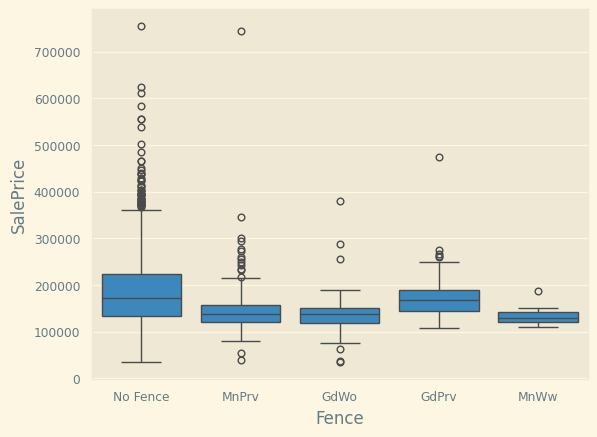

In [374]:
# fence vs salesPrice
sns.boxplot(x = 'Fence', y = 'SalePrice', data = df)
plt.show()

most portion of Fence cols is covered by No Fence, which mean there almost 20-30% fence covered

now


If you see at columns with word Bsmt - Base-ment so we can group as they represent Basement related value.

In [375]:
Basement_col=df[["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1", "BsmtFinType2","BsmtFinSF1", "BsmtFinSF2",
                         "BsmtUnfSF","TotalBsmtSF"]]
print(Basement_col)

     BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
0          Gd       TA           No          GLQ          Unf         706   
1          Gd       TA           Gd          ALQ          Unf         978   
2          Gd       TA           Mn          GLQ          Unf         486   
3          TA       Gd           No          ALQ          Unf         216   
4          Gd       TA           Av          GLQ          Unf         655   
...       ...      ...          ...          ...          ...         ...   
1455       Gd       TA           No          Unf          Unf           0   
1456       Gd       TA           No          ALQ          Rec         790   
1457       TA       Gd           No          GLQ          Unf         275   
1458       TA       TA           Mn          GLQ          Rec          49   
1459       TA       TA           No          BLQ          LwQ         830   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
0              0        150     

<Figure size 2000x1200 with 0 Axes>

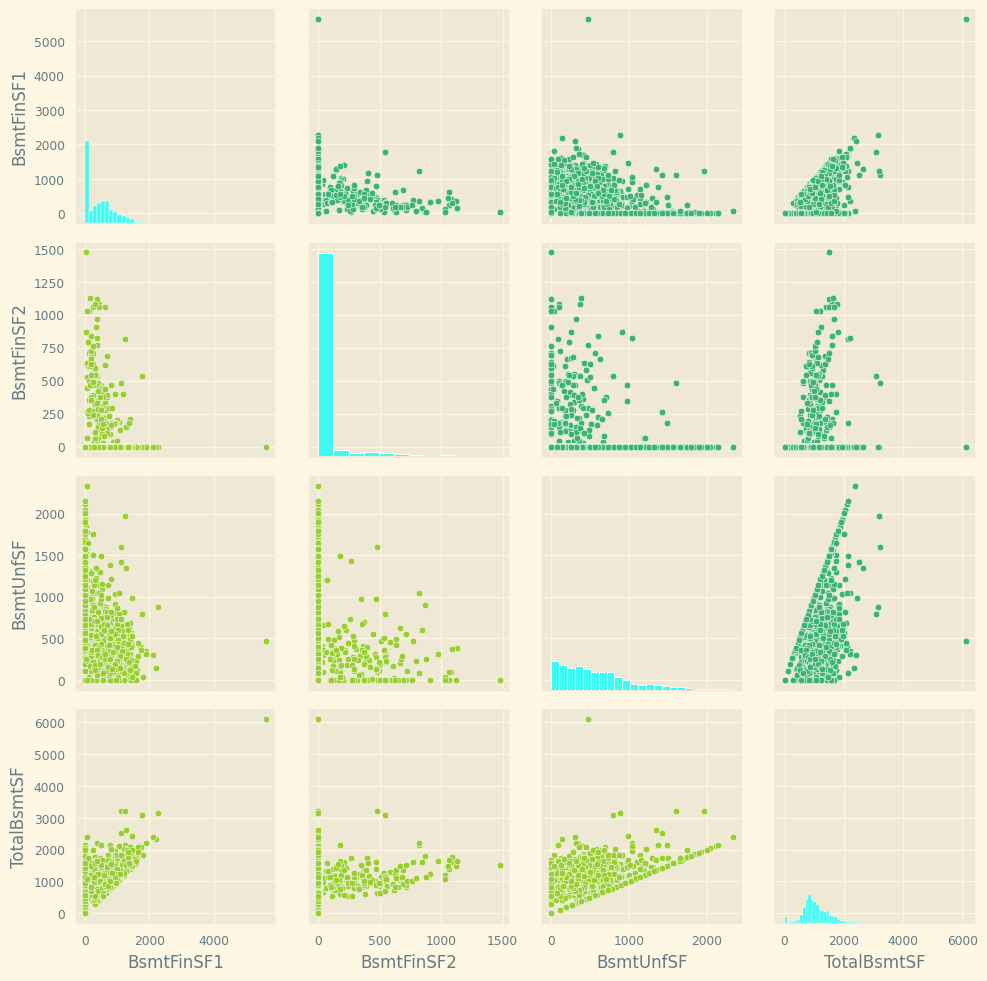

In [376]:
# We are using PairGrid(we can also use pairplot) for ploting basement representing values columns
plt.figure(figsize=(20, 12))

g=sns.PairGrid(Basement_col)
g.map_upper(sns.scatterplot,color='mediumseagreen')
g.map_lower(sns.scatterplot, color='yellowgreen')
g.map_diag(sns.histplot,color='aqua')
plt.show()

<Figure size 2000x1200 with 0 Axes>

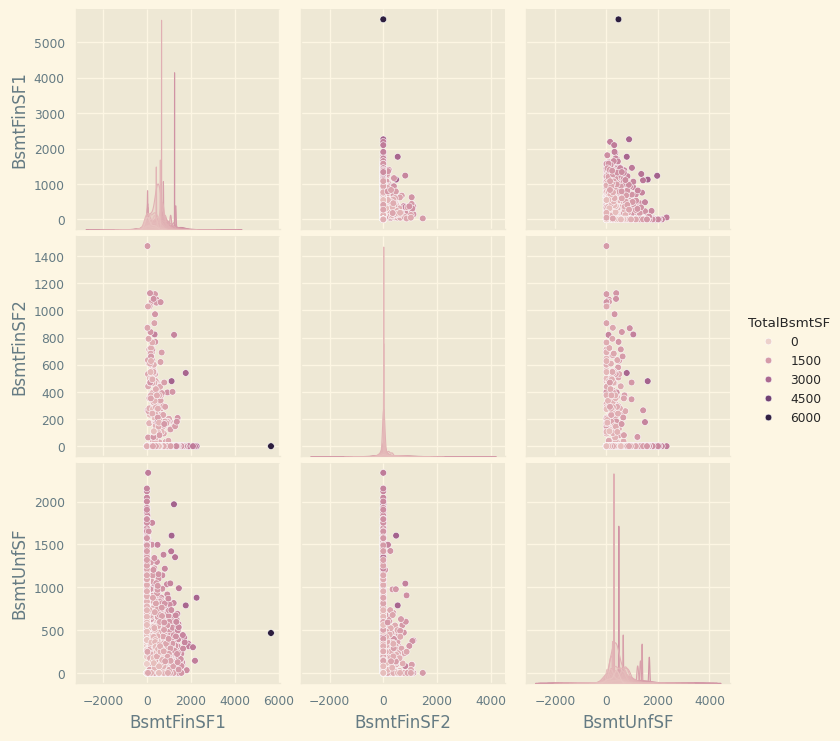

In [377]:
#let plot basement with hue = 'TotalBSMTSF'
plt.figure(figsize=(20, 12))
#sns.pairplot(Basement_col)
sns.pairplot(Basement_col,hue='TotalBsmtSF')
plt.show()

Observation: we can clearly see that "BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF" as they are  show similar plot and also they do add much of impact.

<Axes: xlabel='BsmtFinType2', ylabel='SalePrice'>

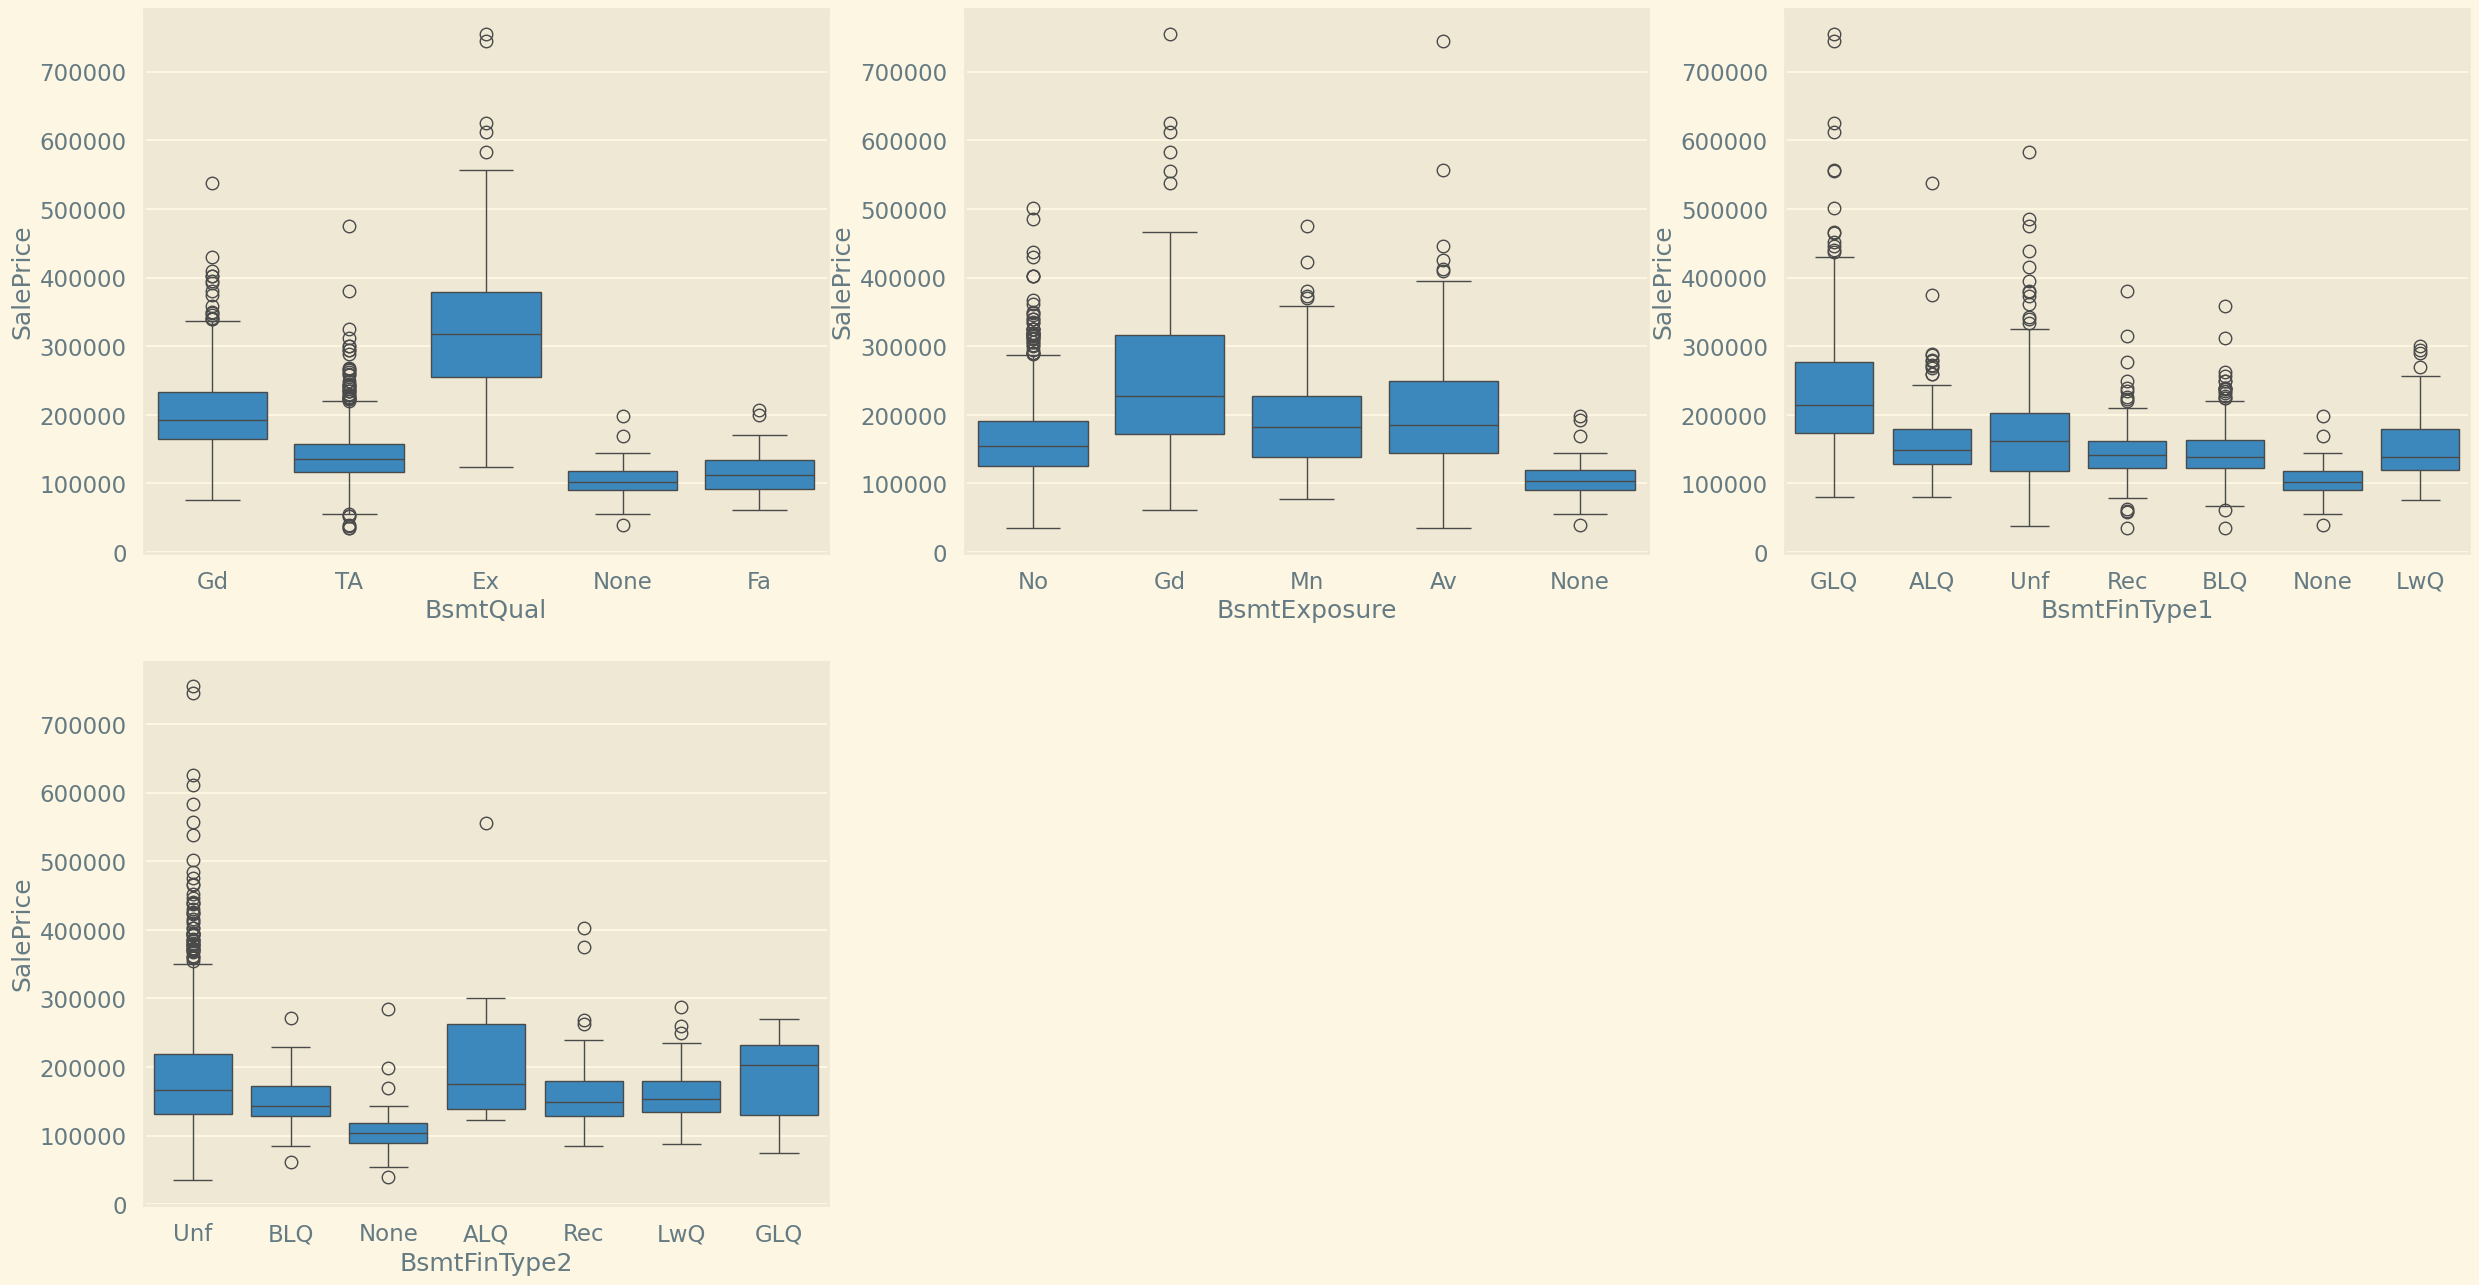

In [378]:
# let also se does remaing basement columns impact on sale
plt.figure(figsize=(30, 24))
sns.set_context("talk")
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = df)

As you can see BsmtFinType2, BsmtFinType1, BsmtExposure as they dont have much of impact
- so we can drop

In [379]:
# drop
drop=["BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF","BsmtFinType2", "BsmtFinType1", "BsmtExposure" ]
df.drop(drop, axis=1, inplace=True)
df.shape

(1460, 54)

In [380]:
#We can also drop ID column - as there is no use of that column
df.drop("Id", axis = 1, inplace = True)
df.shape

(1460, 53)

Now

Let us do also plot graph of garbage related group

In [381]:
plt.style.use('seaborn-dark')

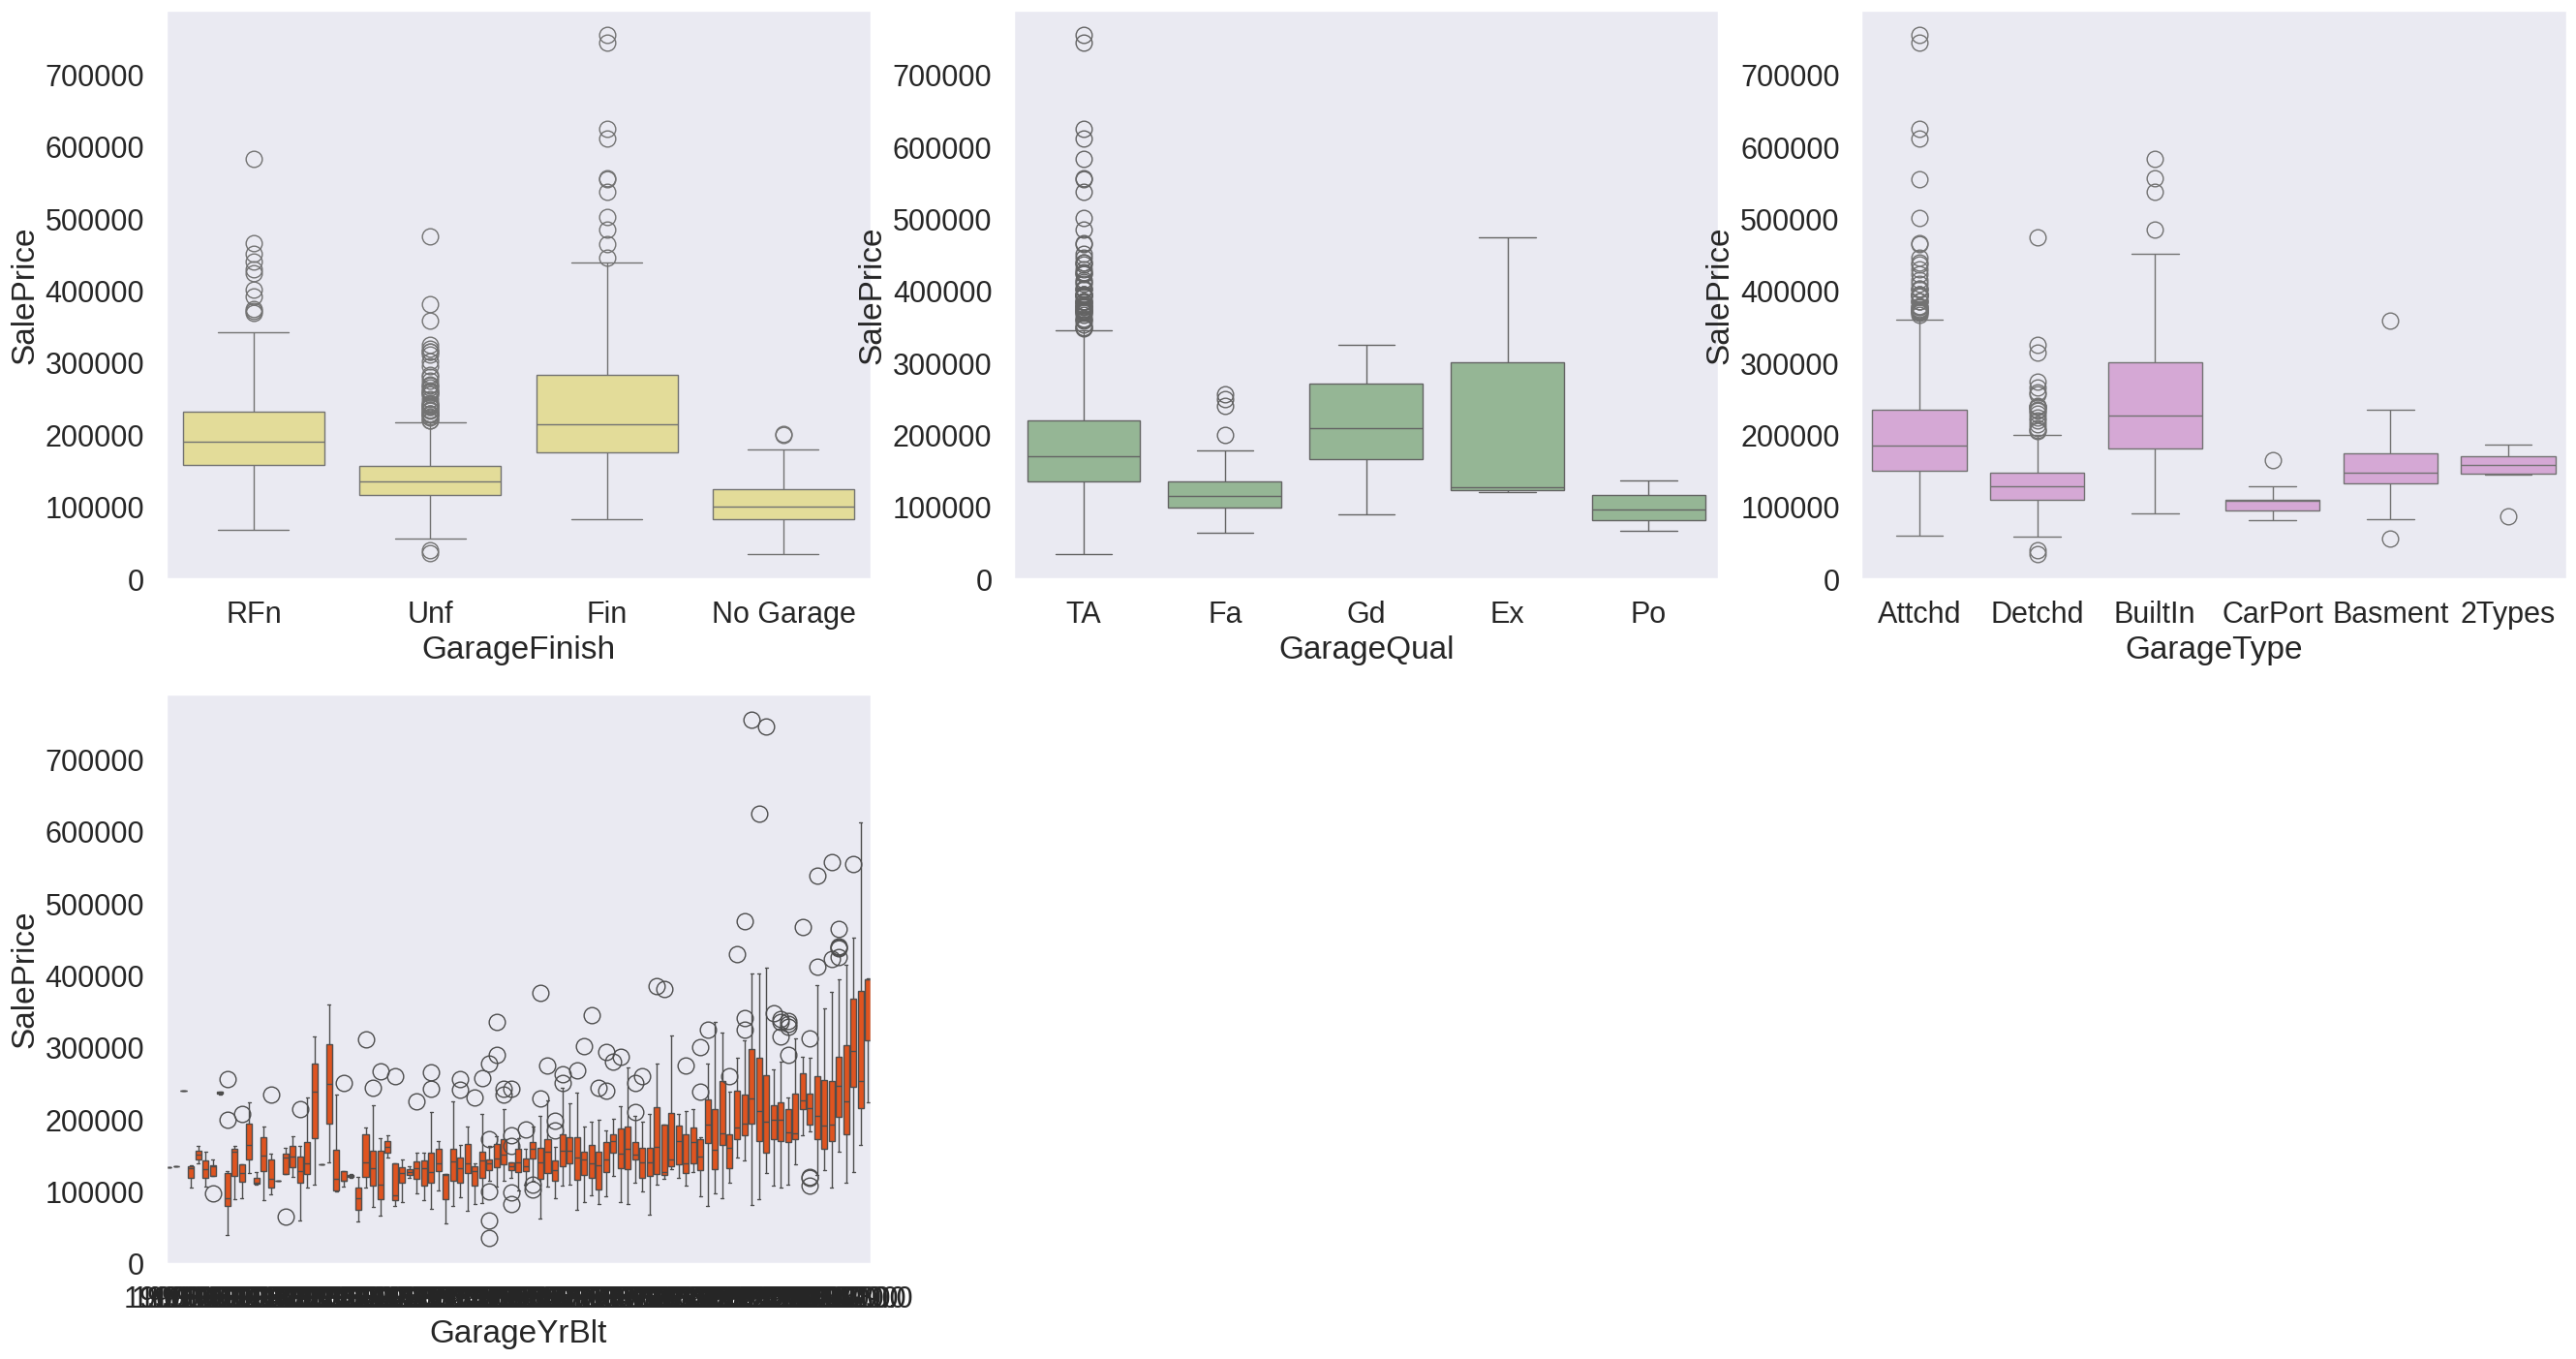

In [382]:
plt.figure(figsize=(32, 26))
sns.set_context("poster")
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df,color='khaki')
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = df,color='darkseagreen')
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageType',y = 'SalePrice', data = df,color='plum')
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageYrBlt',y = 'SalePrice', data = df,color='orangered')
plt.show()

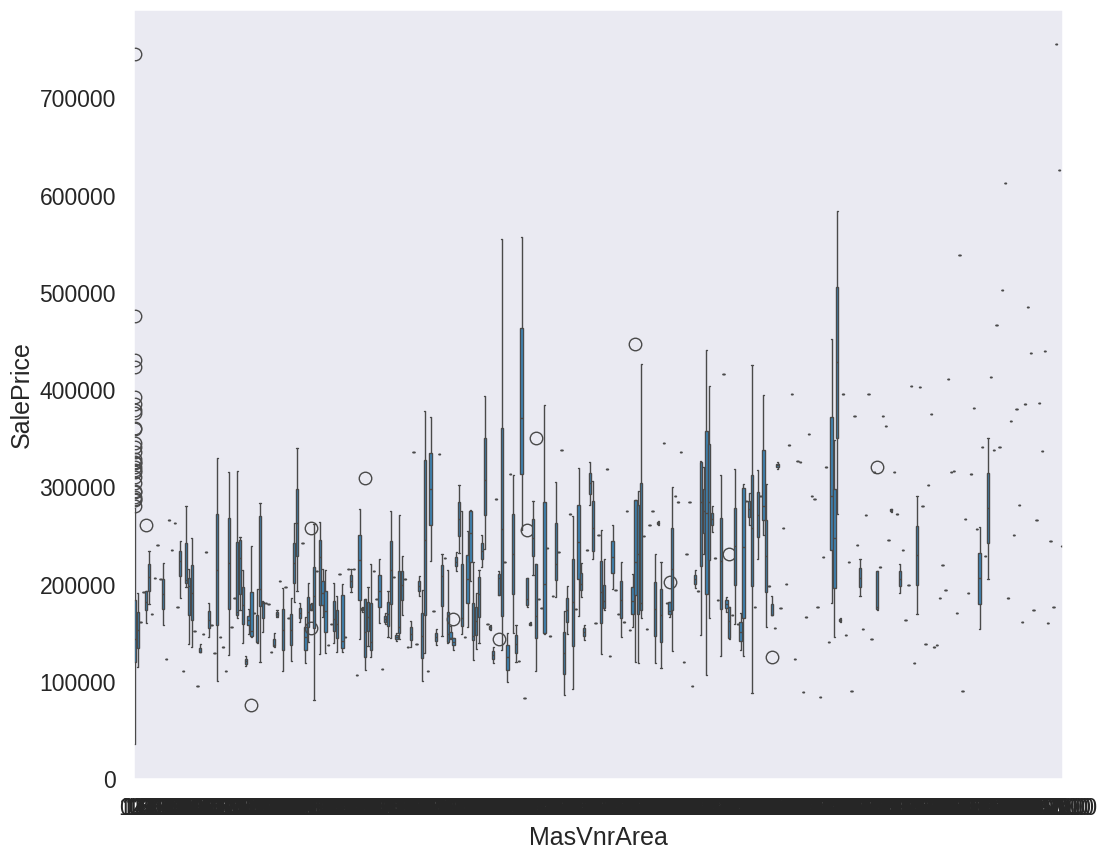

In [383]:
plt.figure(figsize=(12,10))
sns.set_context("talk")
sns.boxplot(x = 'MasVnrArea', y = 'SalePrice', data = df)
plt.show()

drop GarabageQual ,MasVnrArea as it shows  less influence

In [384]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'Fence', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [385]:
df.drop('GarageQual', axis=1, inplace=True)
df.shape

(1460, 52)

In [386]:
df.drop("MasVnrArea", axis=1, inplace=True)
df.shape

(1460, 51)

checking outliner

In [387]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'Fence', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [388]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99]).transpose()
# for numeric cols

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      69.863699     22.027677     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       90%        95%        99%       max  
MSSubClass         50.0      70.00     120.0     160.00     190.00     190.0  
LotFrontage        69.0      79.00      92.0     104.00     137.41     313.0  
LotArea          9478.5   11601.50   14381.7   17401.15   37567.64  215245.0  
OverallQual         6.0       7.00       8.0       8.00      10.00      10.0  
OverallCond         5.0       6.00       7.0       8.00       9.00       9.0  
YearBuilt        1973.0    2000.00    2006.0    2007.00    2009.00    2010.0  
YearRemodAdd     1994.0    2004.00    2006.0    2007.00    2009.00    2010.0  
TotalBsmtSF       991.5    1298.25    1602.2    1753.00    2155.05    6110.0  
1stFlrSF         1087.0    1391.25    1680.0    1831.25    2219.46    4692.0  
2ndFlrSF            0.0     728.00     954.2    1141.05    1418.92    2065.0  
GrLivArea        1464.0    1776.75    2158.3    2466.10    3123.48    5642.0  
BsmtFullBath        0.0       1.00       1.0       1.00       2.00       3.0  
FullBath            2.0       2.00       2.0       2.00       3.00       3.0  
HalfBath            0.0       1.00       1.0       1.00       1.00       2.0  
BedroomAbvGr        3.0       3.00       4.0       4.00       5.00       8.0  
TotRmsAbvGrd        6.0       7.00       9.0      10.00      11.00      14.0  
Fireplaces          1.0       1.00       1.0       2.00       2.00       3.0  
GarageYrBlt      1980.0    2002.00    2006.0    2007.00    2009.00    2010.0  
GarageCars          2.0       2.00       3.0       3.00       3.00       4.0  
GarageArea        480.0     576.00     757.1     850.10    1002.79    1418.0  
WoodDeckSF          0.0     168.00     262.0     335.00     505.46     857.0  
OpenPorchSF        25.0      68.00     130.0     175.05     285.82     547.0  
EnclosedPorch       0.0       0.00     112.0     180.15     261.05     552.0  
MoSold              6.0       8.00      10.0      11.00      12.00      12.0  
YrSold           2008.0    2009.00    2010

<Axes: ylabel='2ndFlrSF'>

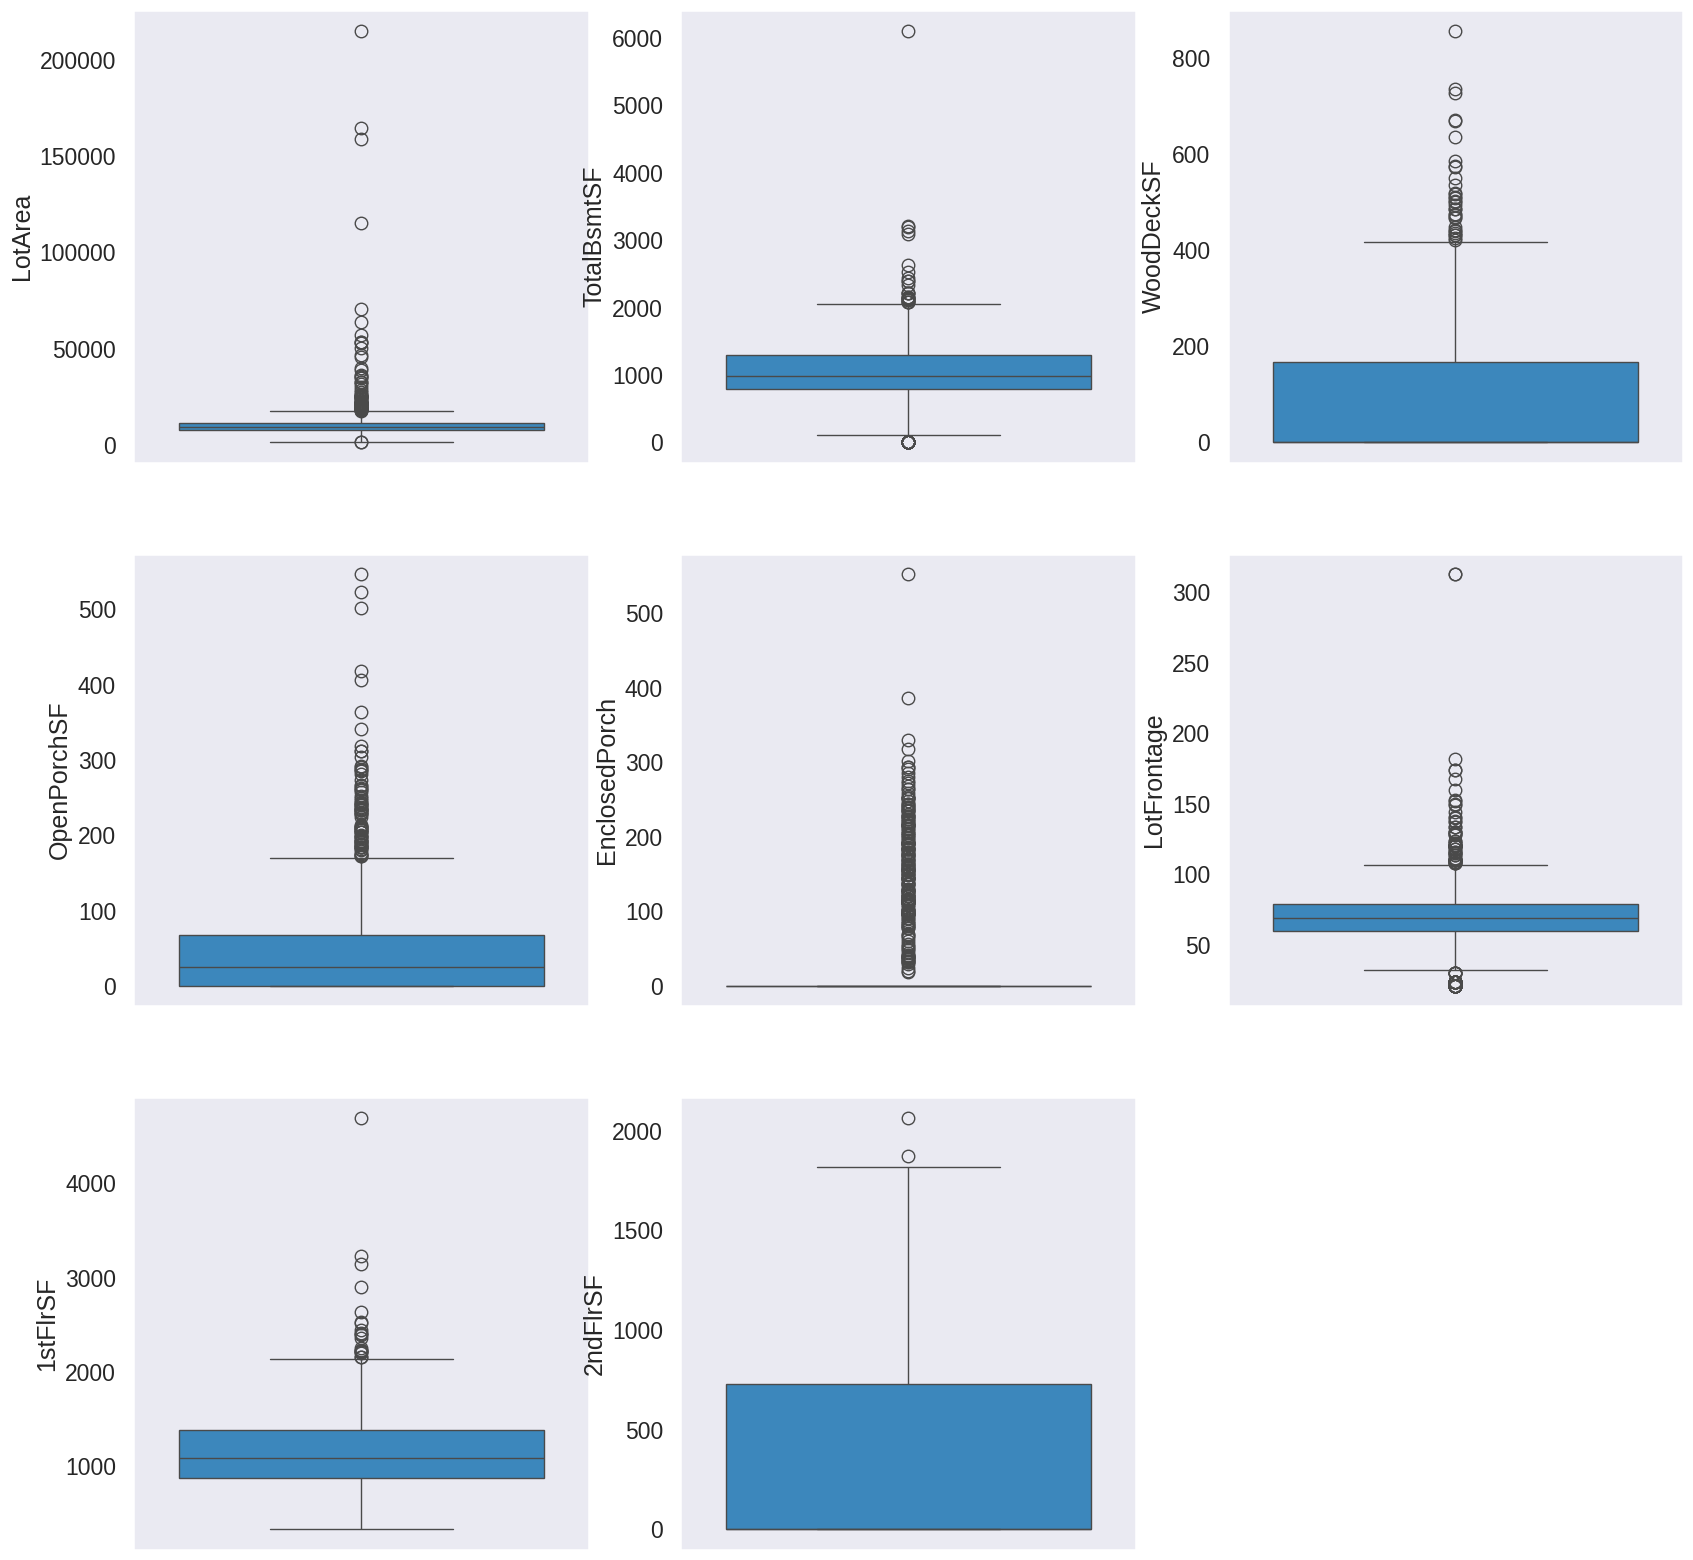

In [389]:
# ploting boxplot for numeric cols for outliner
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea", data = df)
plt.subplot(3,3,2)
sns.boxplot(y="TotalBsmtSF", data = df)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', data = df)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', data = df)
plt.subplot(3,3,5)
sns.boxplot(y = 'EnclosedPorch', data = df)
plt.subplot(3,3,6)
sns.boxplot(y = 'LotFrontage', data = df)
plt.subplot(3,3,7)
sns.boxplot(y = '1stFlrSF', data = df)
plt.subplot(3,3,8)
sns.boxplot(y = '2ndFlrSF', data = df)


Outliners Treatments--

In [390]:
# Removing Outliers

# Removing values beyond 99% for LotArea
df = df[df["LotArea"] < df['LotArea'].quantile(0.99)]

# Removing values beyond 99% for TotalBsmtSF
df = df[df["TotalBsmtSF"] < df['TotalBsmtSF'].quantile(0.99)]


# Removing values beyond 99% for WoodDeckSF
df = df[df["WoodDeckSF"] < df['WoodDeckSF'].quantile(0.99)]


# Removing values beyond 99% for OpenPorchSF
df= df[df["OpenPorchSF"] < df['OpenPorchSF'].quantile(0.99)]

# Removing values beyond 99% for OpenPorchSF
df = df[df["EnclosedPorch"] < df['EnclosedPorch'].quantile(0.99)]

In [391]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [392]:
# treating small value outliner
df= remove_outliers(df,'GrLivArea')

In [393]:
df.shape

(1357, 51)

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1357 entries, 0 to 1458
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1357 non-null   int64  
 1   MSZoning       1357 non-null   object 
 2   LotFrontage    1357 non-null   float64
 3   LotArea        1357 non-null   int64  
 4   LotShape       1357 non-null   object 
 5   LandContour    1357 non-null   object 
 6   LotConfig      1357 non-null   object 
 7   Neighborhood   1357 non-null   object 
 8   Condition1     1357 non-null   object 
 9   BldgType       1357 non-null   object 
 10  HouseStyle     1357 non-null   object 
 11  OverallQual    1357 non-null   int64  
 12  OverallCond    1357 non-null   int64  
 13  YearBuilt      1357 non-null   int64  
 14  YearRemodAdd   1357 non-null   int64  
 15  RoofStyle      1357 non-null   object 
 16  Exterior1st    1357 non-null   object 
 17  Exterior2nd    1357 non-null   object 
 18  MasVnrType   

In [395]:
sns.set_theme()


<Axes: ylabel='2ndFlrSF'>

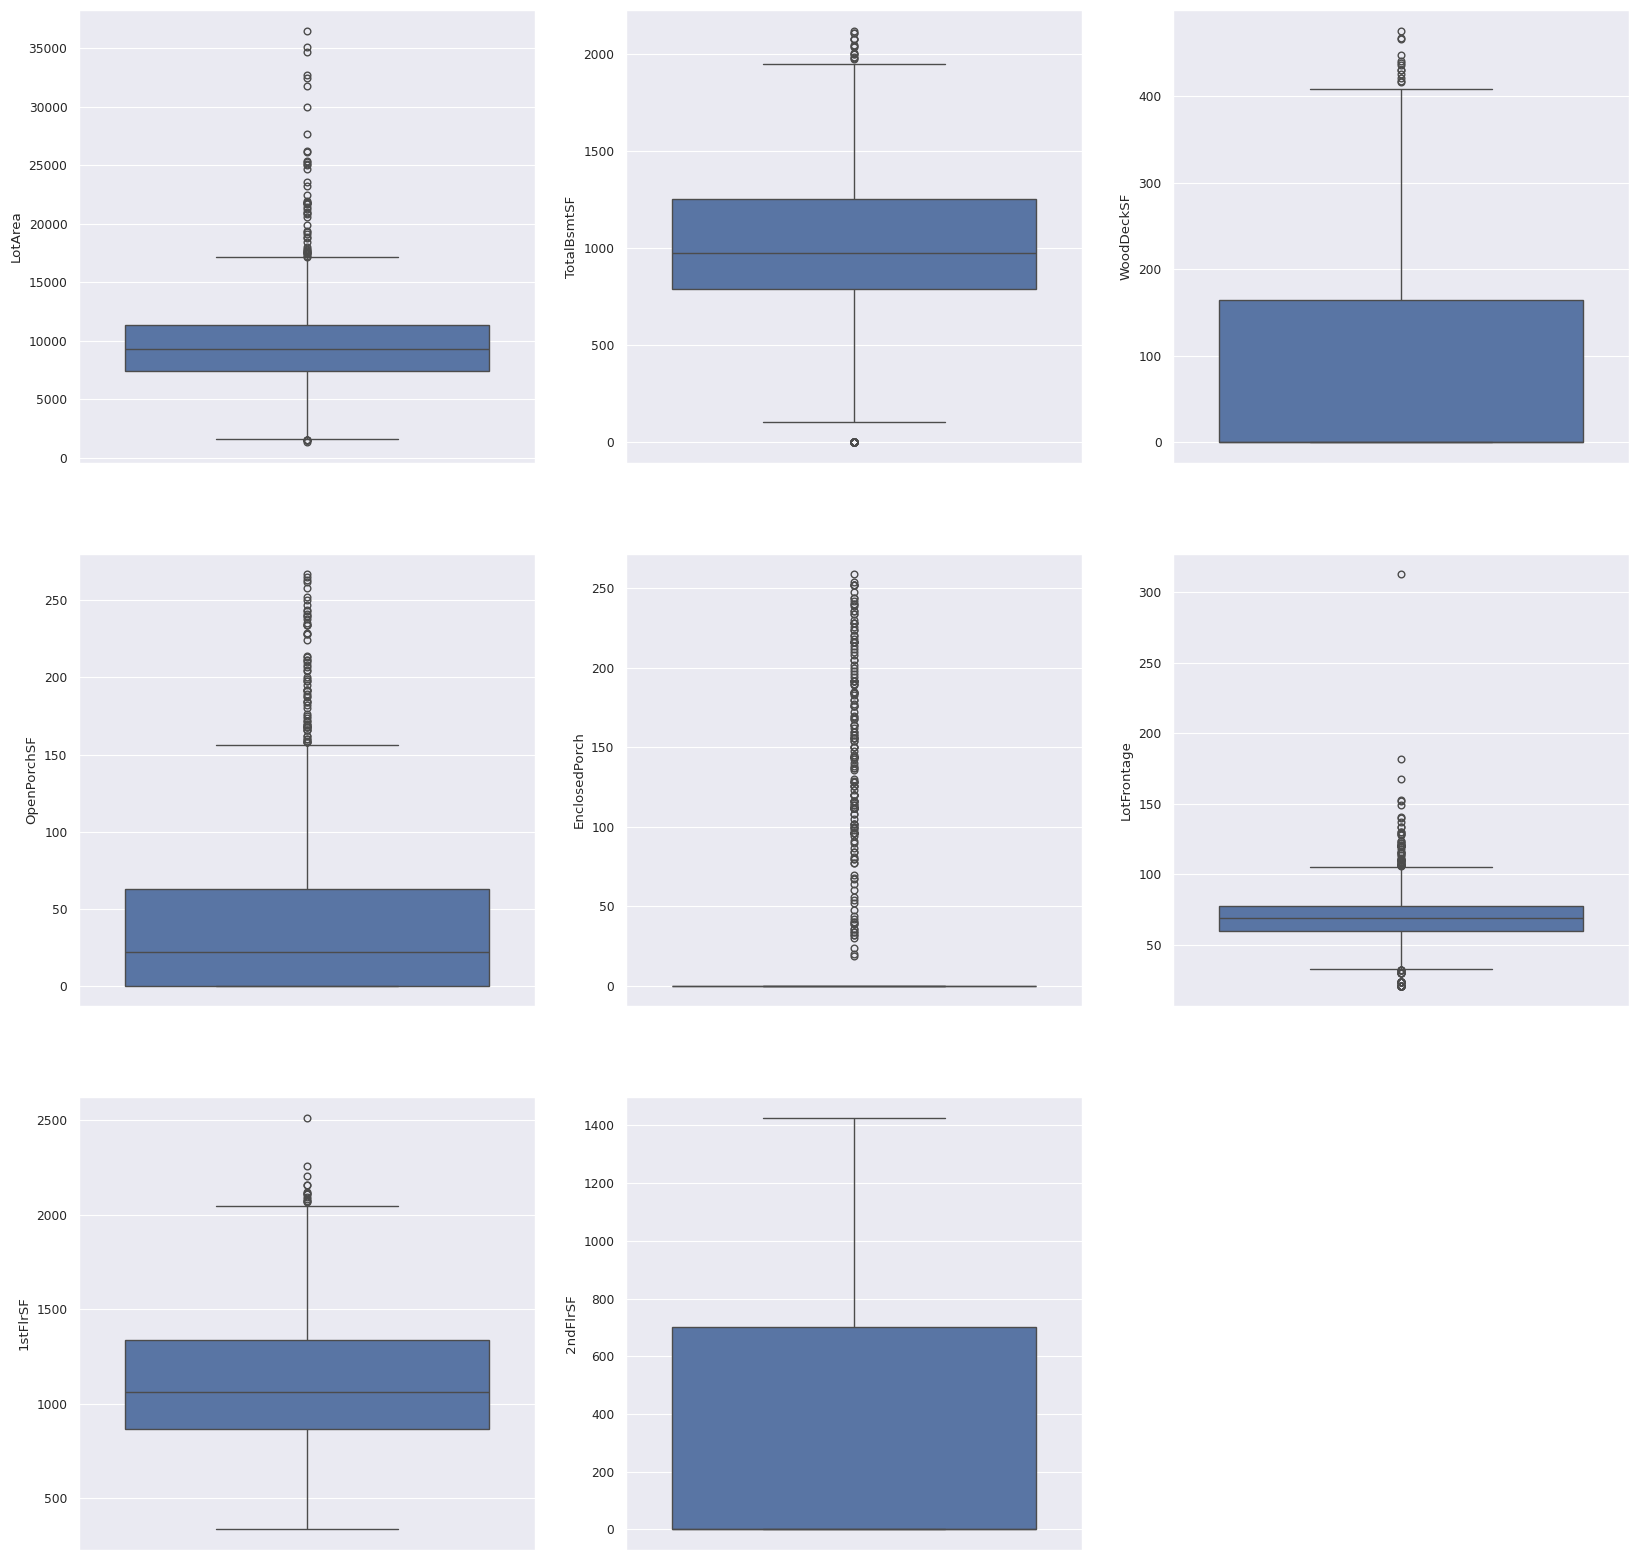

In [396]:
plt.figure(figsize=(20, 20))
sns.set_context("paper")
plt.subplot(3,3,1)
sns.boxplot(y="LotArea", data = df)
plt.subplot(3,3,2)
sns.boxplot(y="TotalBsmtSF", data = df)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', data = df)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', data = df)
plt.subplot(3,3,5)
sns.boxplot(y = 'EnclosedPorch', data = df)
plt.subplot(3,3,6)
sns.boxplot(y = 'LotFrontage', data = df)
plt.subplot(3,3,7)
sns.boxplot(y = '1stFlrSF', data = df)
plt.subplot(3,3,8)
sns.boxplot(y = '2ndFlrSF', data = df)

#Data Visualization

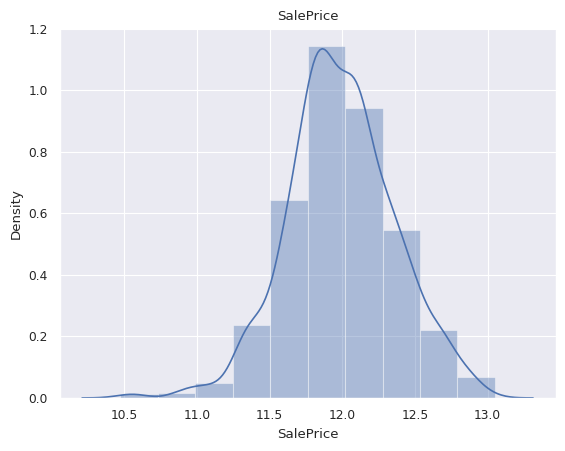

In [397]:
# transform the sales price
df['SalePrice'] = np.log1p(df['SalePrice'])

plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

In [398]:
df.shape

(1357, 51)

In [399]:
# Taking pairplot for numeric plot i.e 21 col in to 2-group, because it will have very long execution time
plot1=df[['LotFrontage','LotArea','MSSubClass','OverallQual', 'OverallCond','TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea',
                  'SalePrice']]

plot2=df[['BsmtFullBath','FullBath', 'HalfBath','BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageCars','GarageArea', 'WoodDeckSF',
'OpenPorchSF','SalePrice']]

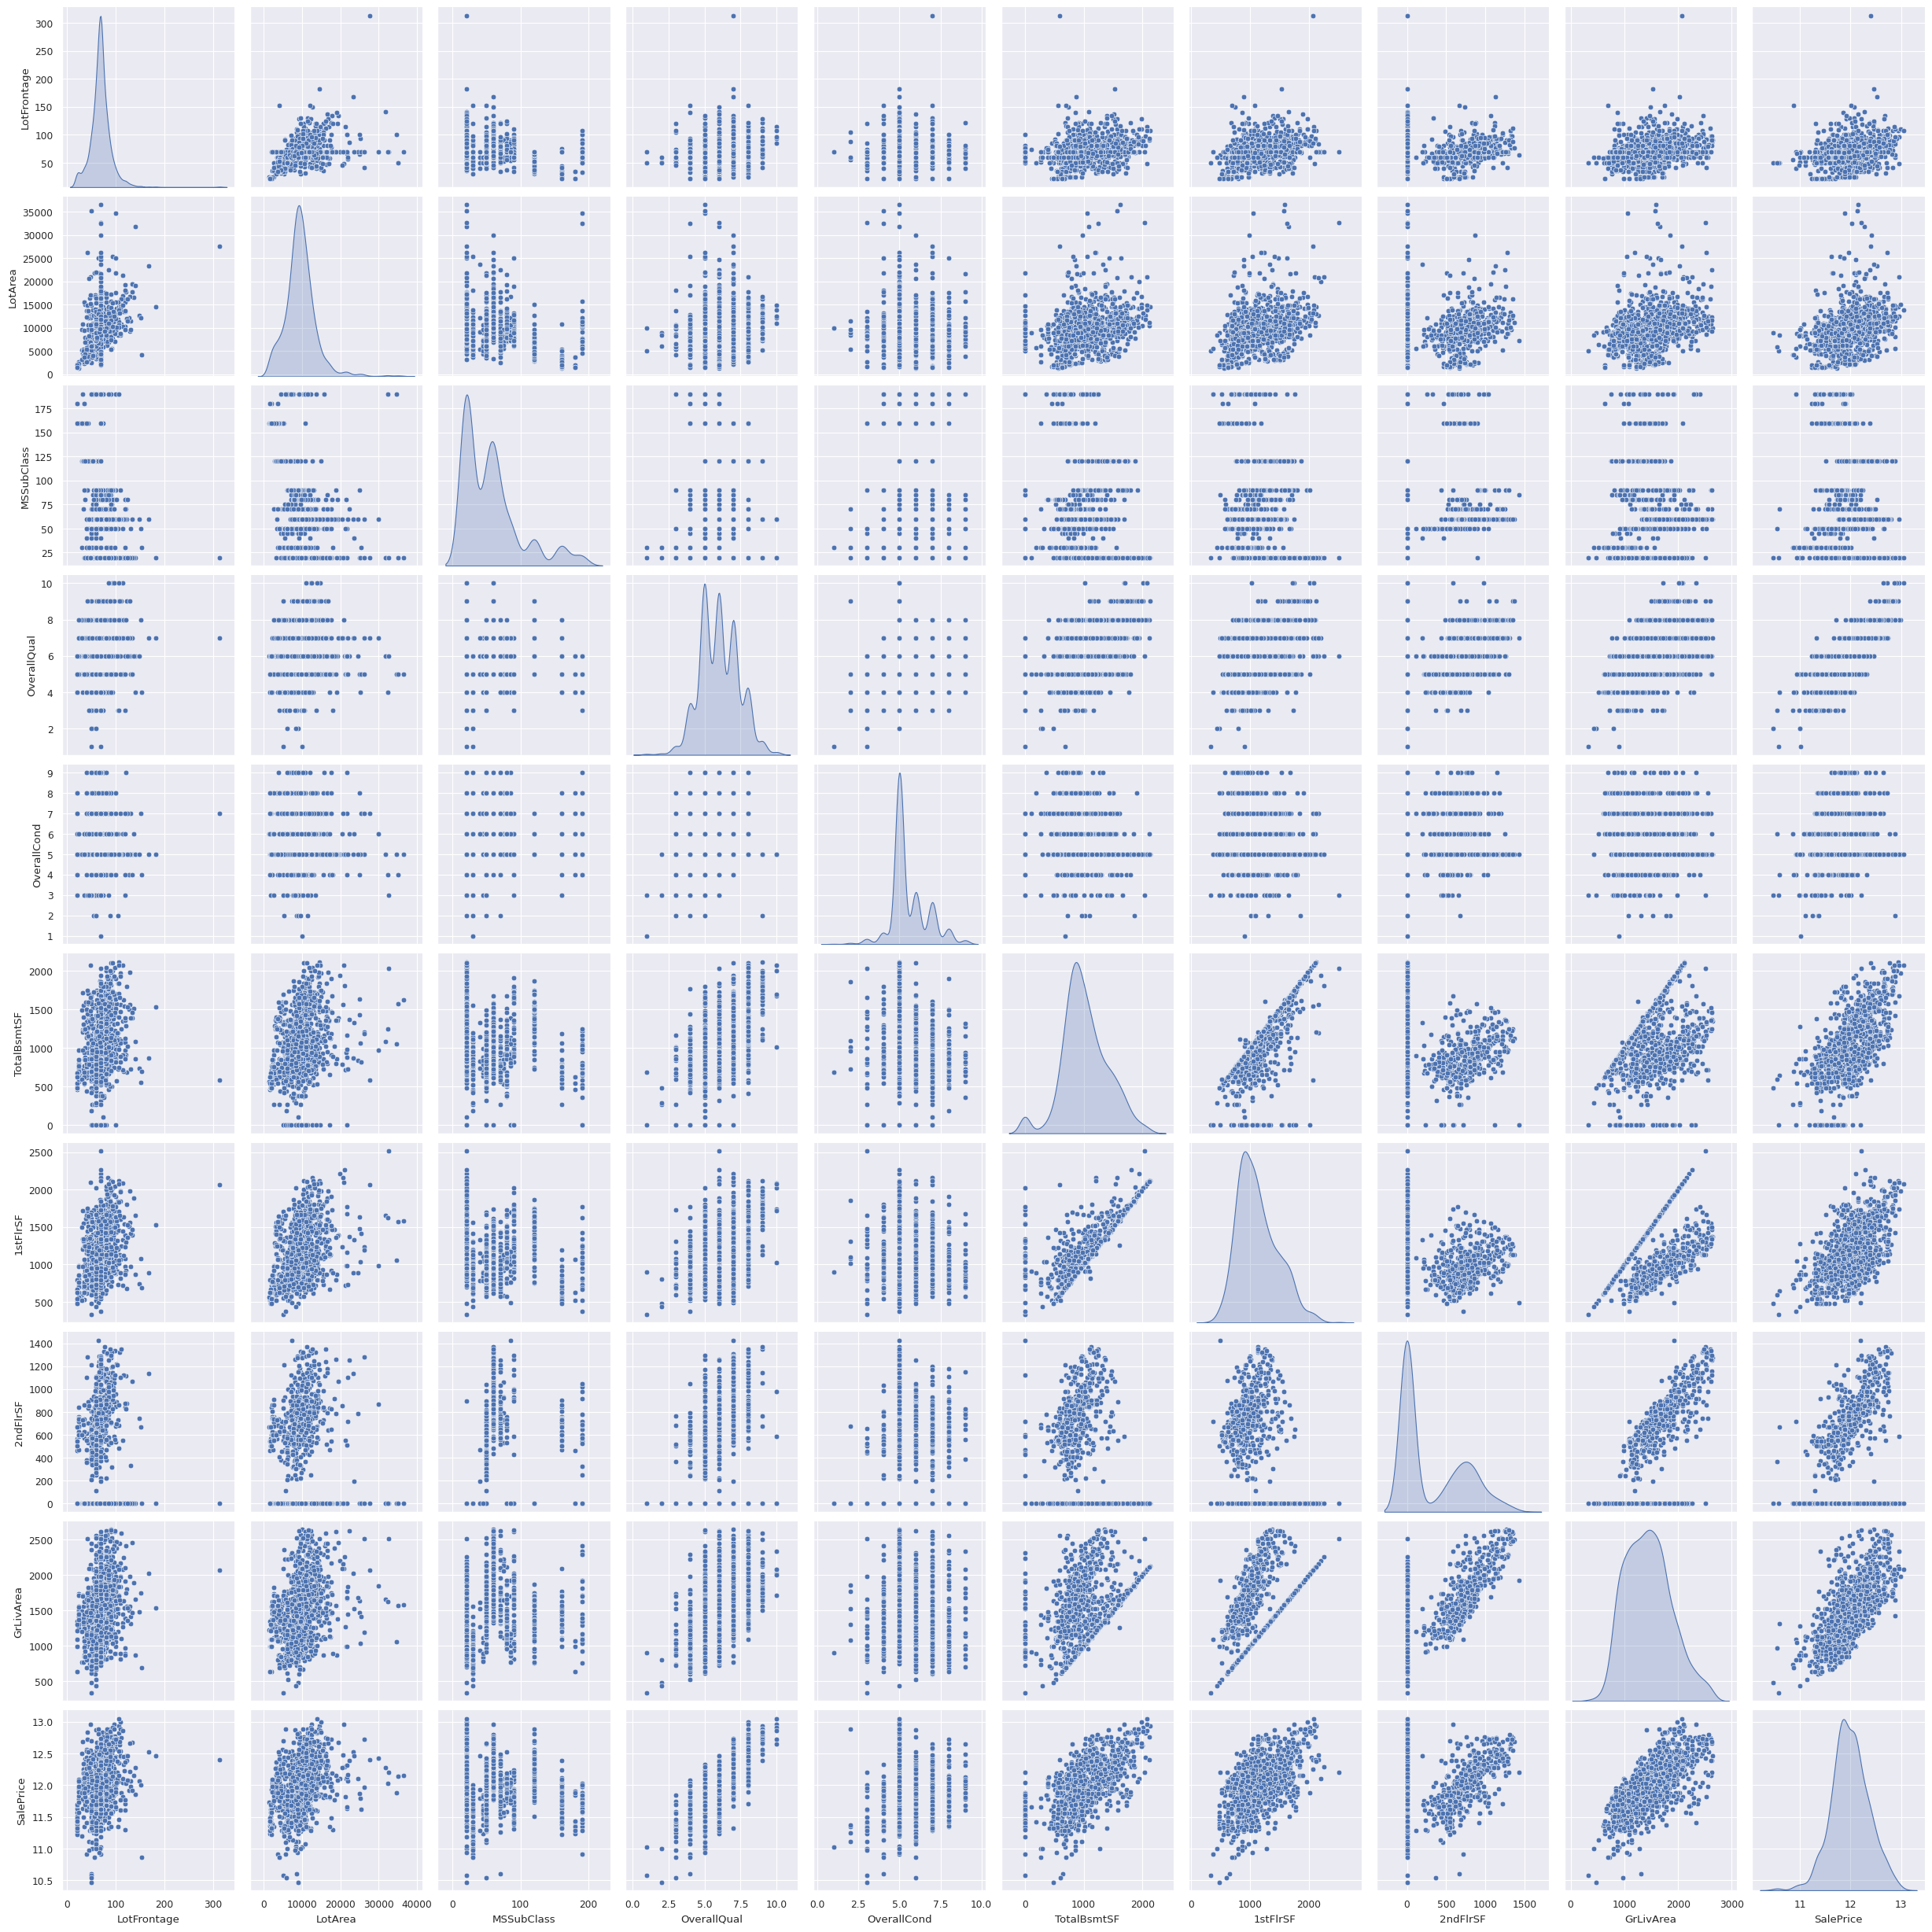

In [400]:
#plot 1
sns.pairplot(plot1, diag_kind='kde')
plt.show()

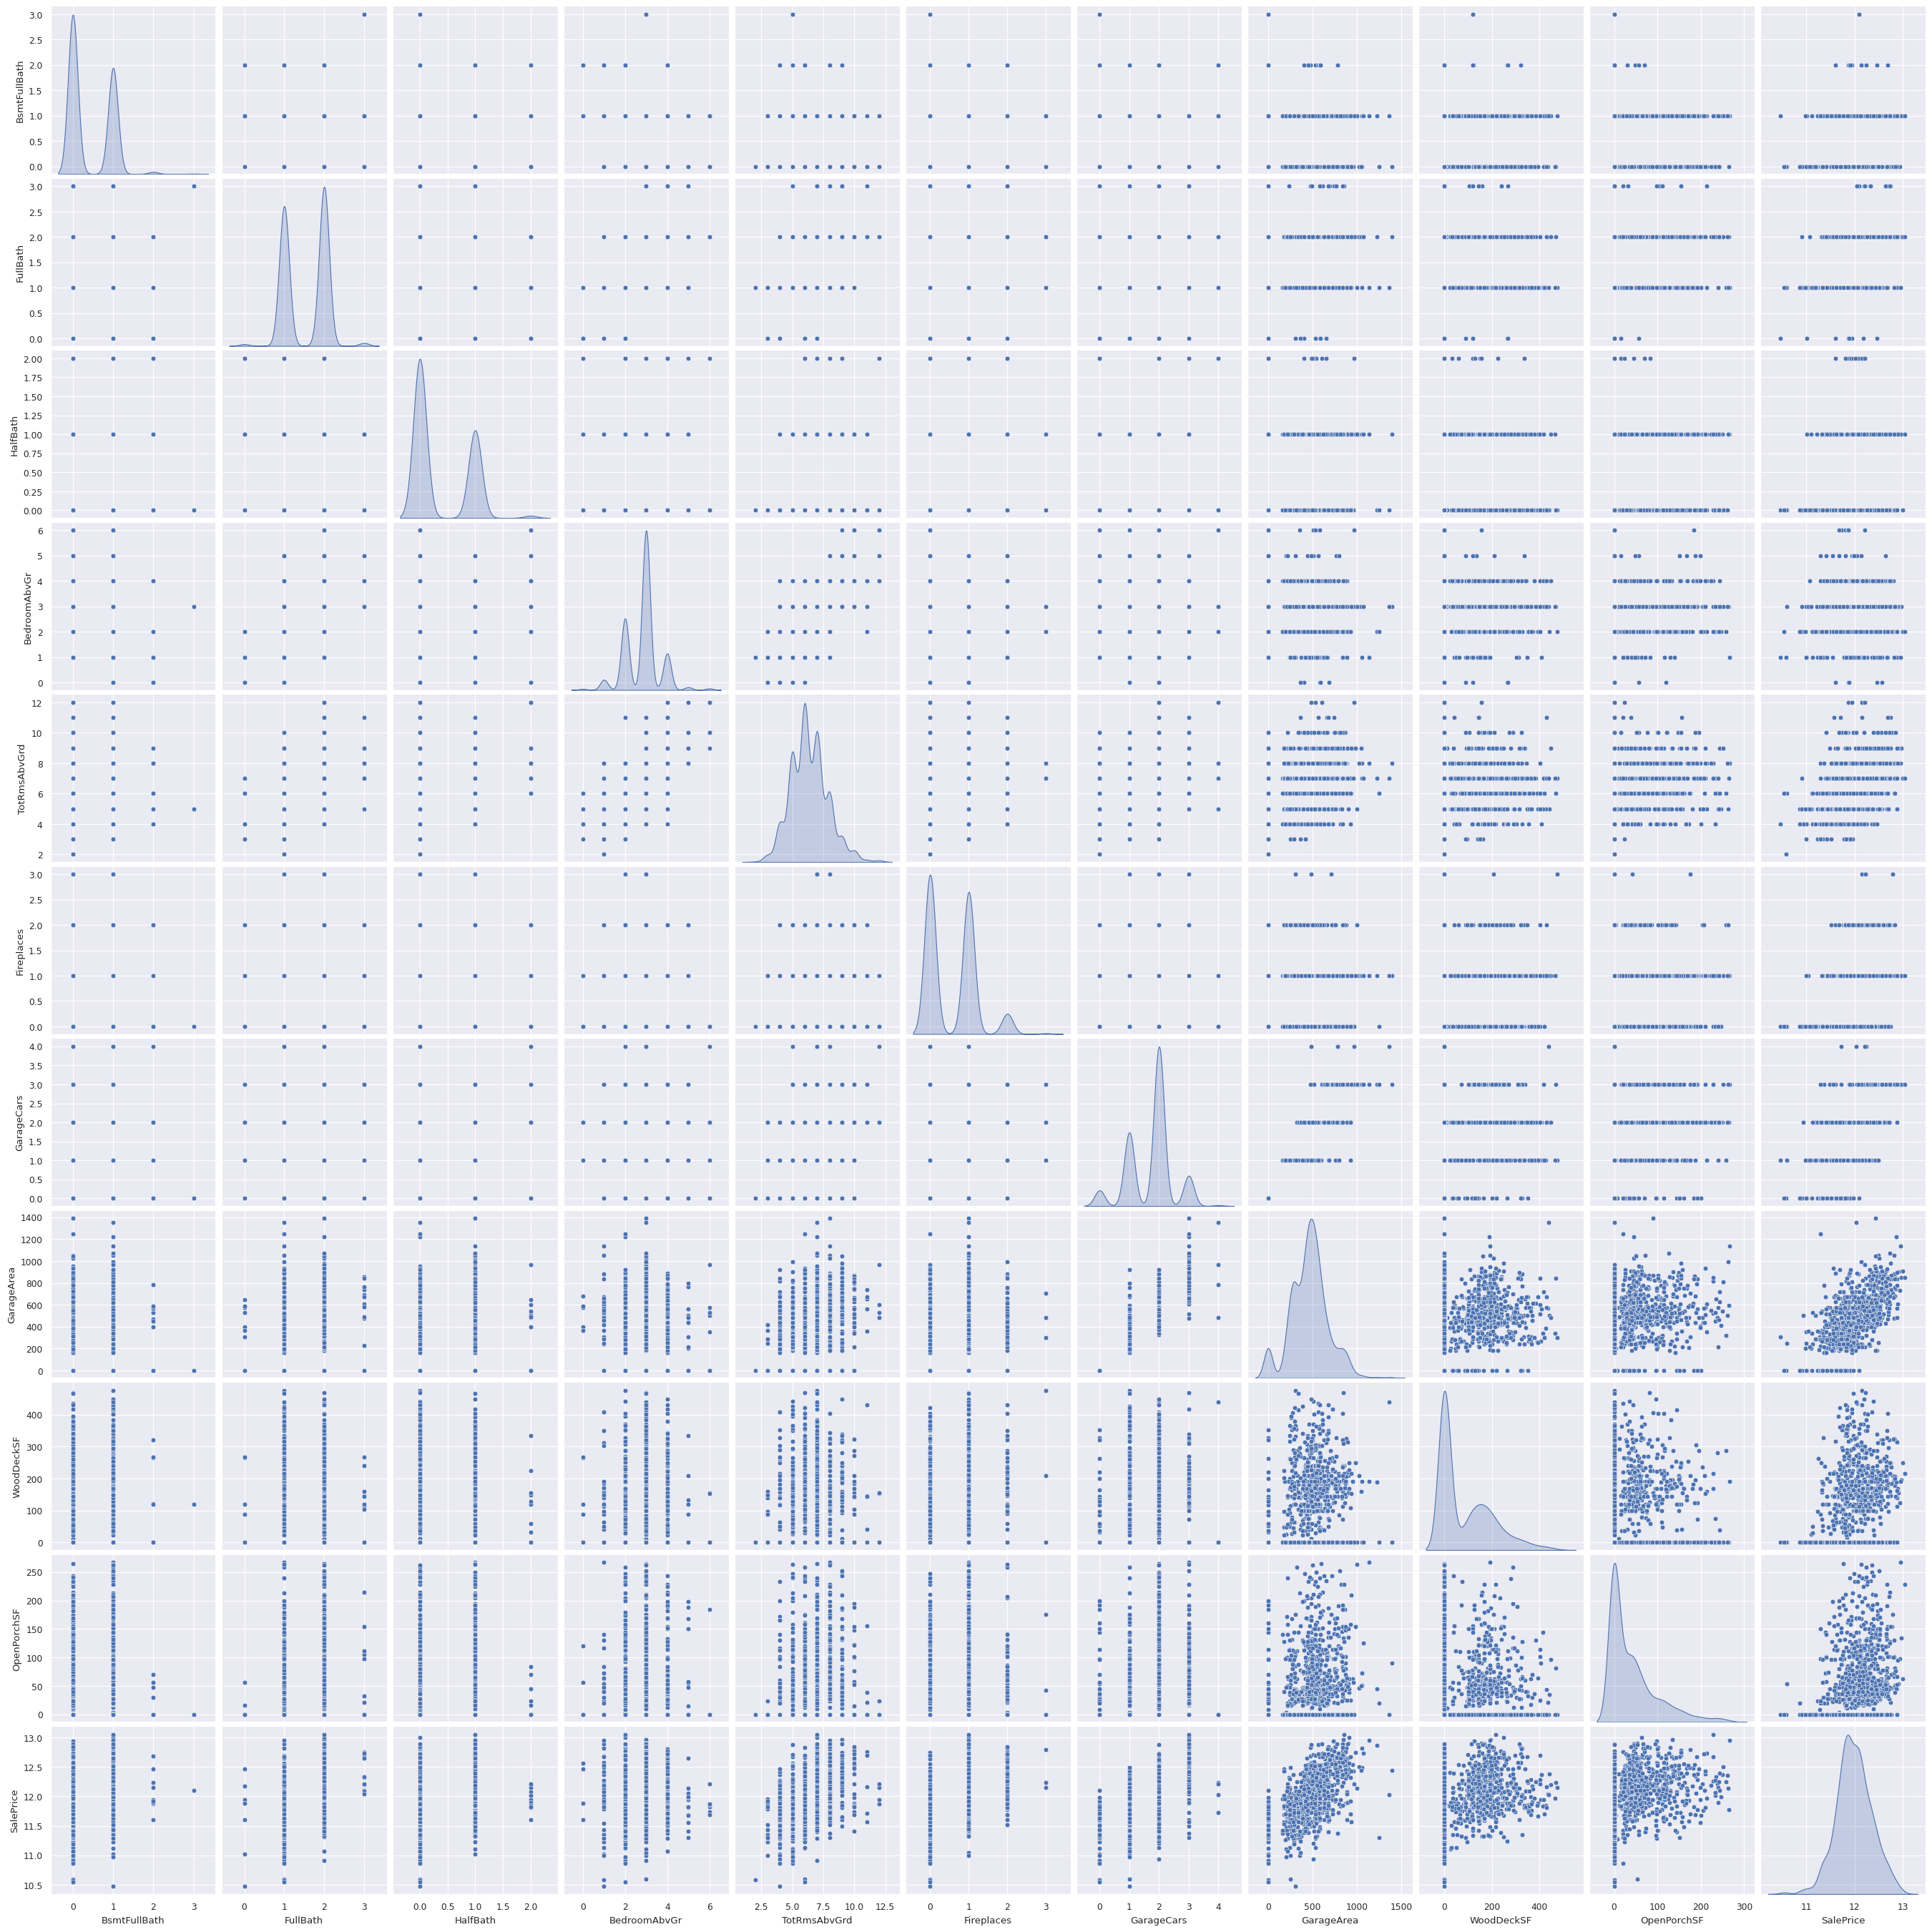

In [401]:
#plot 2
sns.pairplot(plot2, diag_kind='kde')
plt.show()

plot correlation

In [402]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
#only numeric

In [403]:
# correlation matrix
cor = df_numeric.corr()

In [404]:
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.395770 -0.358258     0.045479    -0.065149   
LotFrontage     -0.395770     1.000000  0.524498     0.186607    -0.041801   
LotArea         -0.358258     0.524498  1.000000     0.118184    -0.045083   
OverallQual      0.045479     0.186607  0.118184     1.000000    -0.109128   
OverallCond     -0.065149    -0.041801 -0.045083    -0.109128     1.000000   
YearBuilt        0.047778     0.112593  0.054854     0.612591    -0.368862   
YearRemodAdd     0.046623     0.063319  0.011602     0.558940     0.068868   
TotalBsmtSF     -0.259327     0.262307  0.278235     0.507664    -0.180078   
1stFlrSF        -0.274468     0.347834  0.382887     0.419220    -0.169824   
2ndFlrSF         0.315625     0.019016  0.042764     0.249936    -0.002891   
GrLivArea        0.082935     0.292918  0.341717     0.564592    -0.136826   
BsmtFullBath     0.009958     0.046335  0.090758     0.098924    -0.030727   
FullBath         0.140960     0.150988  0.141075     0.537945    -0.234751   
HalfBath         0.183685     0.023464  0.066190     0.250686    -0.065591   
BedroomAbvGr    -0.061127     0.249165  0.259762     0.079169     0.000370   
TotRmsAbvGrd     0.023745     0.294940  0.312269     0.371369    -0.090468   
Fireplaces      -0.044943     0.193794  0.279062     0.360248    -0.049422   
GarageYrBlt      0.095565     0.061215  0.000222     0.564075    -0.332025   
GarageCars      -0.034434     0.266946  0.256012     0.581831    -0.203717   
GarageArea      -0.098201     0.293325  0.296858     0.529437    -0.166335   
WoodDeckSF      -0.027269     0.072992  0.150179     0.214646    -0.003272   
OpenPorchSF     -0.010208     0.108636  0.136873     0.345274    -0.071832   
EnclosedPorch   -0.024368    -0.010914 -0.012892    -0.135952     0.085172   
MoSold          -0.013626     0.043923 -0.000456     0.092966    -0.006711   
YrSold          -0.017835     0.005485 -0.040893    -0.028189     0.045987   
SalePrice       -0.072466     0.325777  0.336149     0.812890    -0.060569   

               YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
MSSubClass      0.047778      0.046623    -0.259327 -0.274468  0.315625   
LotFrontage     0.112593      0.063319     0.262307  0.347834  0.019016   
LotArea         0.054854      0.011602     0.278235  0.382887  0.042764   
OverallQual     0.612591      0.558940     0.507664  0.419220  0.249936   
OverallCond    -0.368862      0.068868    -0.180078 -0.169824 -0.002891   
YearBuilt       1.000000      0.615873     0.412406  0.301426  0.040962   
YearRemodAdd    0.615873      1.000000     0.298629  0.238149  0.120710   
TotalBsmtSF     0.412406      0.298629     1.000000  0.787719 -0.295331   
1stFlrSF        0.301426      0.238149     0.787719  1.000000 -0.355108   
2ndFlrSF        0.040962      0.120710    -0.295331 -0.355108  1.000000   
GrLivArea       0.263550      0.296126     0.341459  0.454677  0.666213   
BsmtFullBath    0.175970      0.125646     0.286645  0.224495 -0.190109   
FullBath        0.509028      0.441060     0.291519  0.343637  0.369588   
HalfBath        0.246922      0.175930    -0.104188 -0.195109  0.630795   
BedroomAbvGr   -0.051100     -0.052070     0.022452  0.094549  0.468854   
TotRmsAbvGrd    0.119783      0.170462     0.203214  0.328692  0.570696   
Fireplaces      0.162401      0.101874     0.287154  0.360625  0.145918   
GarageYrBlt     0.843026      0.650780     0.335225  0.241177  0.067676   
GarageCars      0.559111      0.412432     0.434910  0.431022  0.146529   
GarageArea      0.496779      0.361457     0.462934  0.461617  0.085165   
WoodDeckSF      0.240923      0.225307     0.205368  0.192566  0.038701   
OpenPorchSF     0.280760      0.281315     0.226977  0.185672  0.201461   
EnclosedPorch  -0.384706     -0.208280    -0.110028 -0.091821  0.039460   
MoSold          0.021919      0.031100     0.052419  0.067213  0.043334   
YrSold         -0.025875      0.0

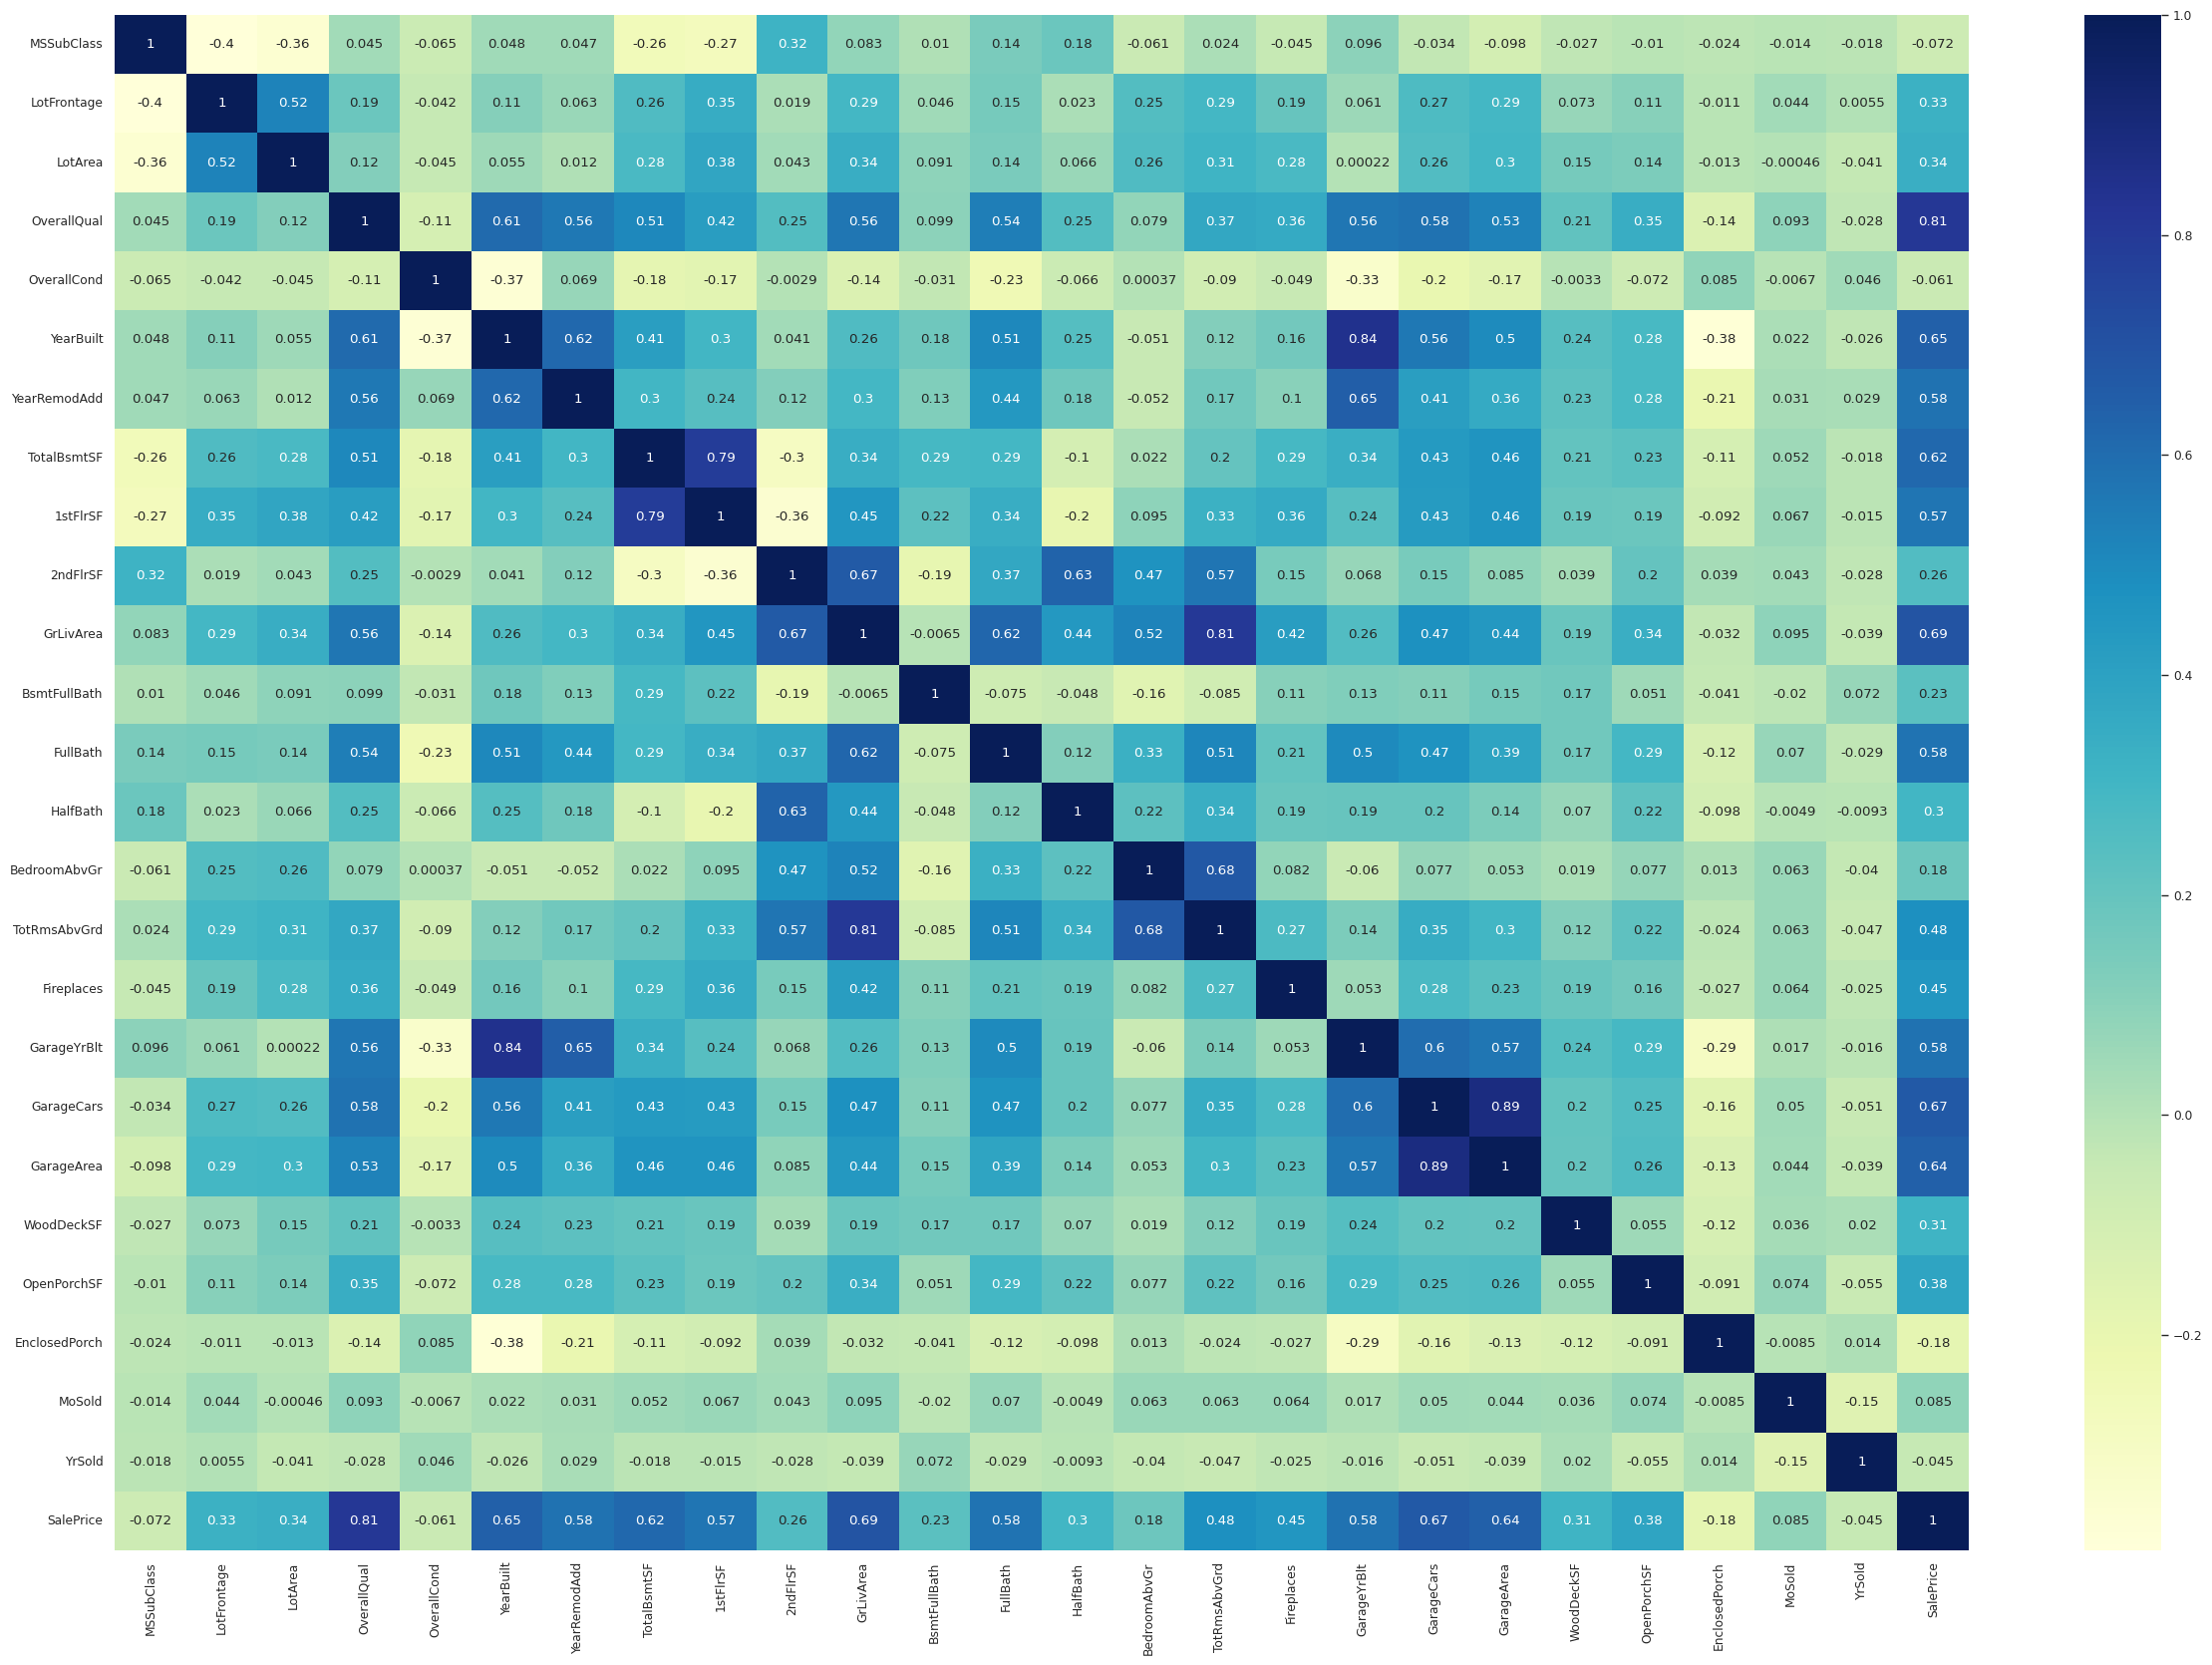

In [405]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

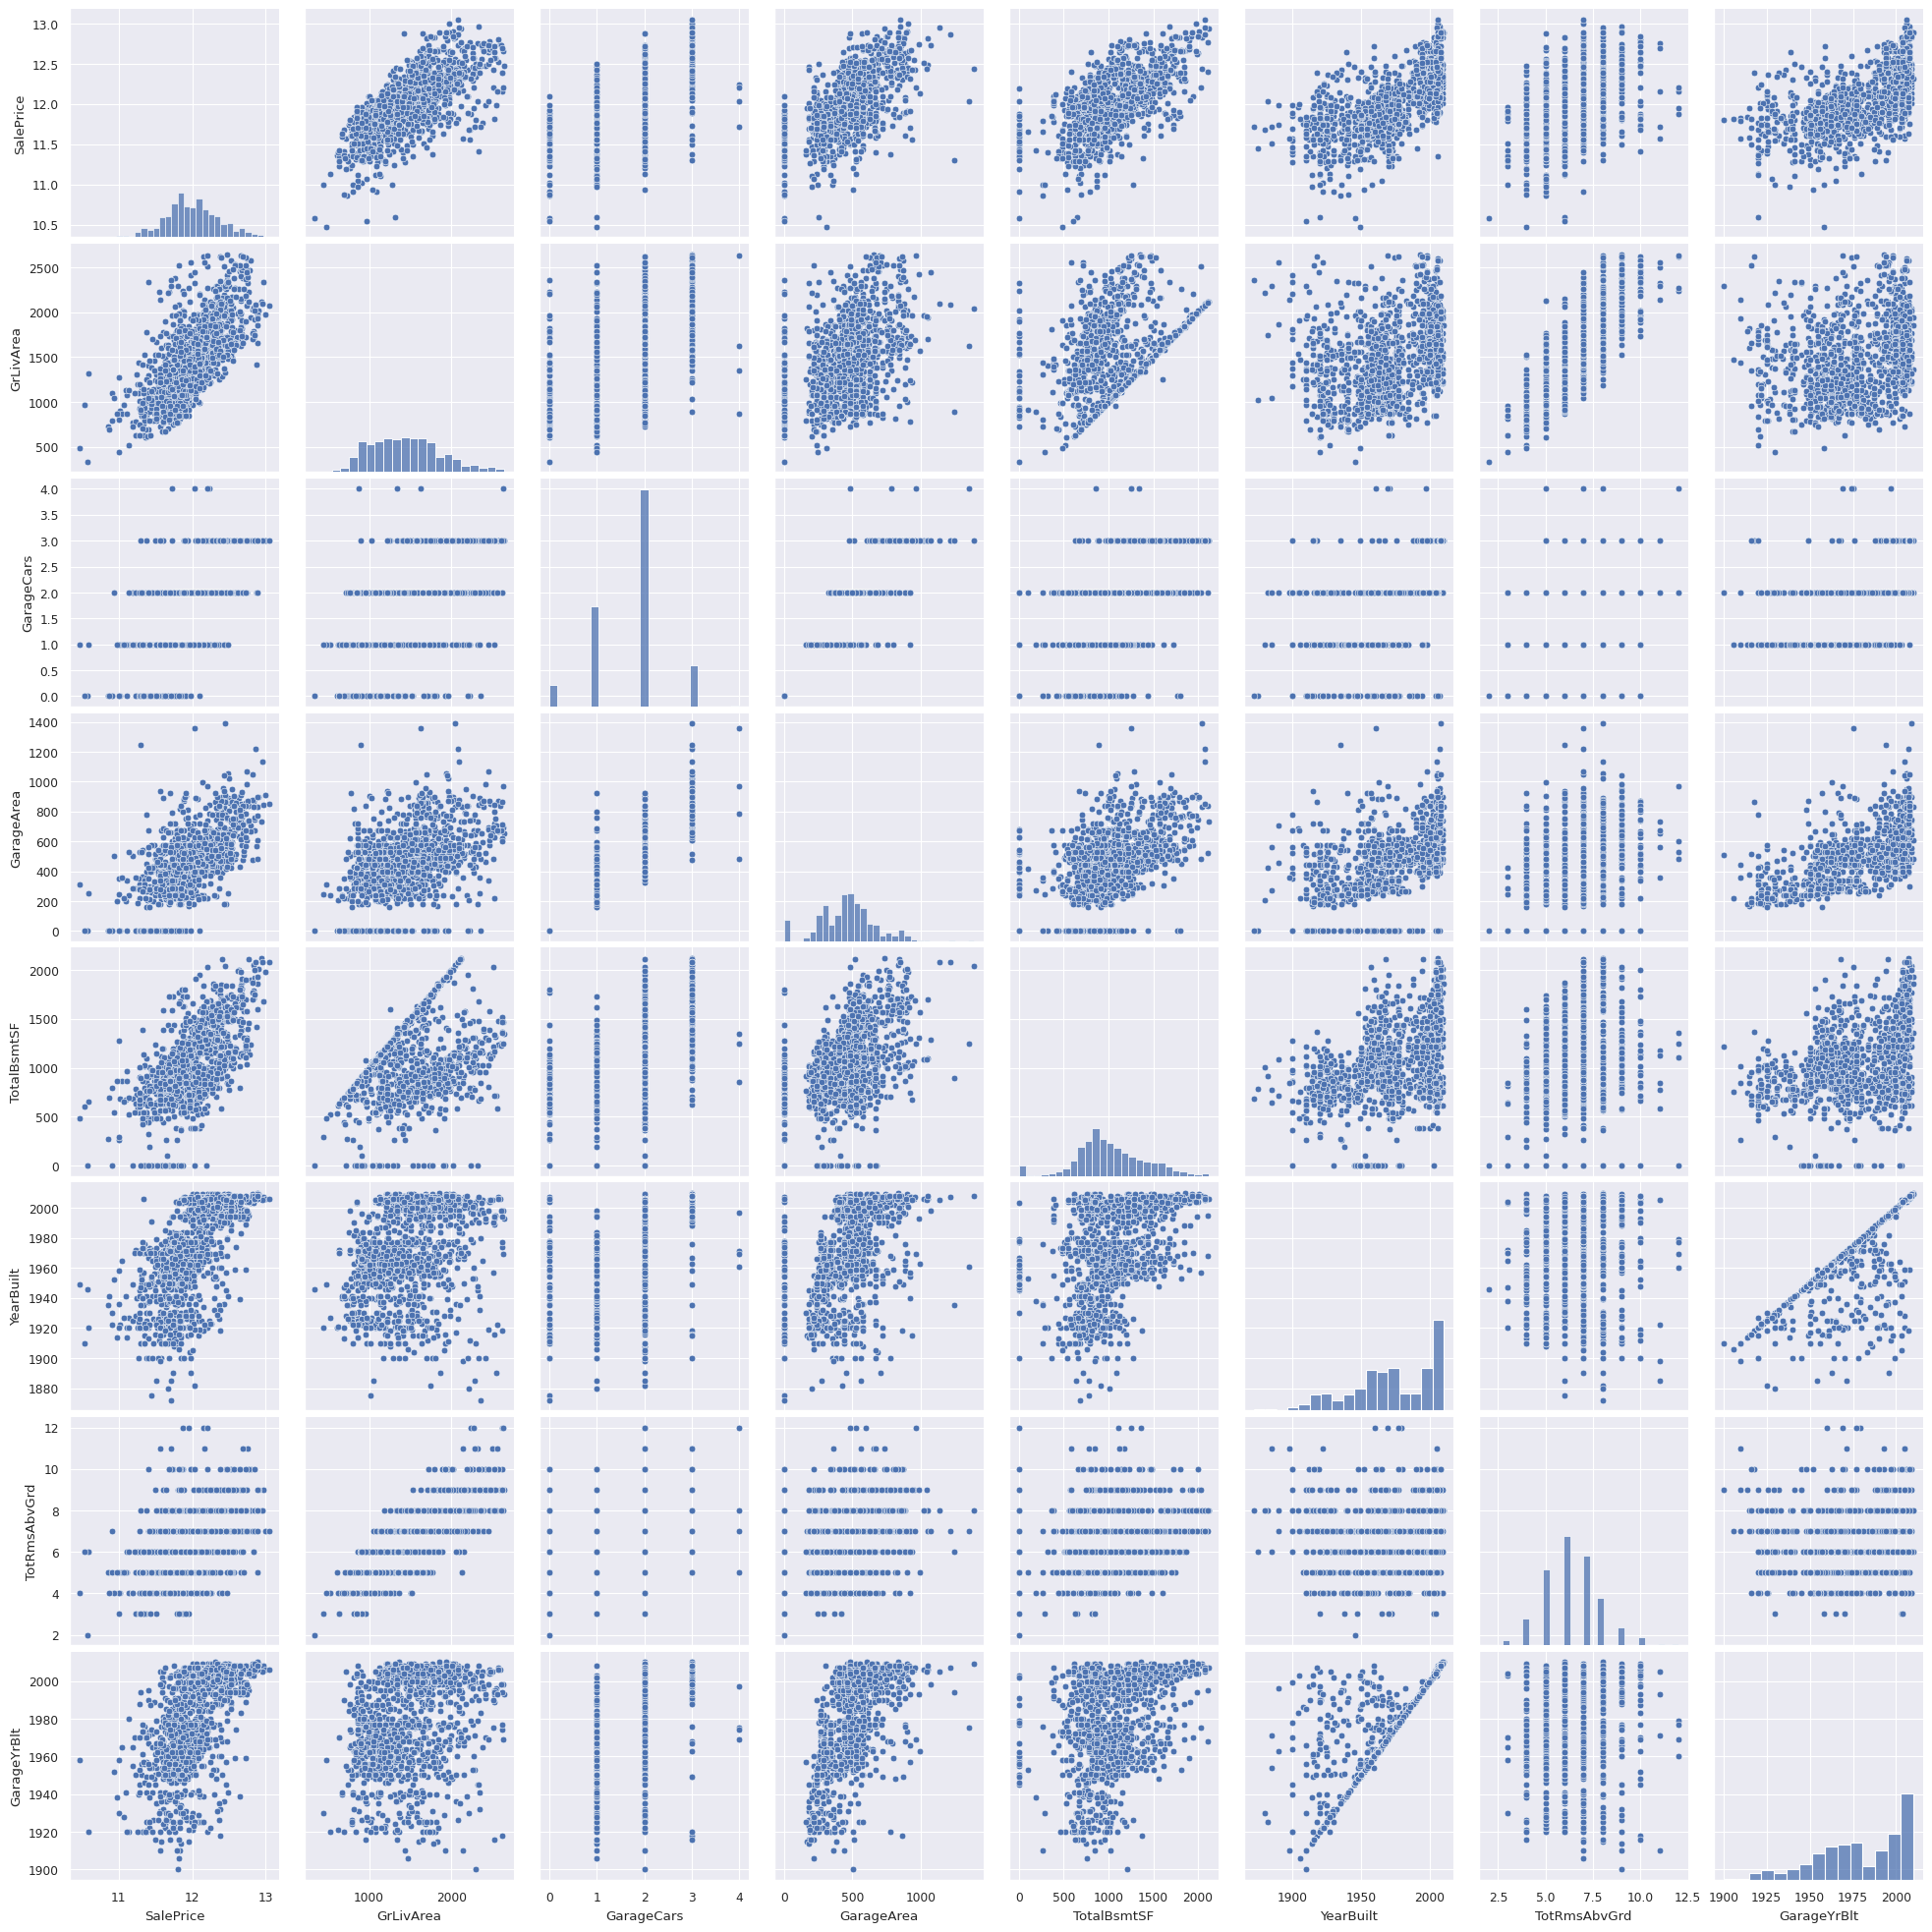

In [406]:
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [407]:
# Drop columns that are correlated and not contributing to 'SalePrice'
df = df.drop(['GarageCars'], axis = 1)
df = df.drop(['TotRmsAbvGrd'], axis = 1)
df = df.drop(['GarageYrBlt'], axis = 1)

Dervied metrics

In [408]:
#house_age  from yearsold - yearbuilt
df['house_age'] = (df['YrSold'] - df['YearBuilt'])
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  \
0      CollgCr       Norm     1Fam     2Story            7            5   
1      Veenker      Feedr     1Fam     1Story            6            8   
2      CollgCr       Norm     1Fam     2Story            7            5   
4      NoRidge       Norm     1Fam     2Story            8            5   
5      Mitchel       Norm     1Fam     1.5Fin            5            5   

   YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  \
0       2003          2003     Gable     VinylSd     VinylSd    BrkFace   
1       1976          1976     Gable     MetalSd     MetalSd       None   
2       2001          2002     Gable     VinylSd     VinylSd    BrkFace   
4       2000          2000     Gable     VinylSd     VinylSd    BrkFace   
5       1993          1995     Gable     VinylSd     VinylSd       None   

  ExterQual ExterCond Foundation BsmtQual BsmtCond  TotalBsmtSF HeatingQC  \
0        Gd        TA      PConc       Gd       TA          856        Ex   
1        TA        TA     CBlock       Gd       TA         1262        Ex   
2        Gd        TA      PConc       Gd       TA          920        Ex   
4        Gd        TA      PConc       Gd       TA         1145        Ex   
5        TA        TA       Wood       Gd       TA          796        Ex   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0       856       854       1710             1         2         1   
1      1262         0       1262             0         2         0   
2       920       866       1786             1         2         1   
4      1145      1053       2198             1         2         1   
5       796       566       1362             1         1         1   

   BedroomAbvGr KitchenQual  Fireplaces   FireplaceQu GarageType GarageFinish  \
0             3          Gd           0  No Fireplace     Attchd          RFn   
1             3          TA           1            TA     Attchd          RFn   
2             3          Gd           1            TA     Attchd          RFn   
4             4          Gd           1            TA     Attchd          RFn   
5             1          TA           0  No Fireplace     Attchd          Unf   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch     Fence  MoSold  \
0         548           0           61              0  No Fence       2   
1         460         298            0              0  No Fence       5   
2         608           0           42              0  No Fence       9   
4         836         192           84              0  No Fence      12   
5         480          40           30              0     MnPrv      10   

   YrSold SaleType SaleCondition  SalePrice  house_age  
0    2008       WD        Normal  12.247699          5  
1    2007       WD        Normal  12.109016         31  
2    2008       WD        Normal  12.317171          7  
4    2008       WD        Normal  12.429220          8  
5    2009       WD        Normal  11.870607         16

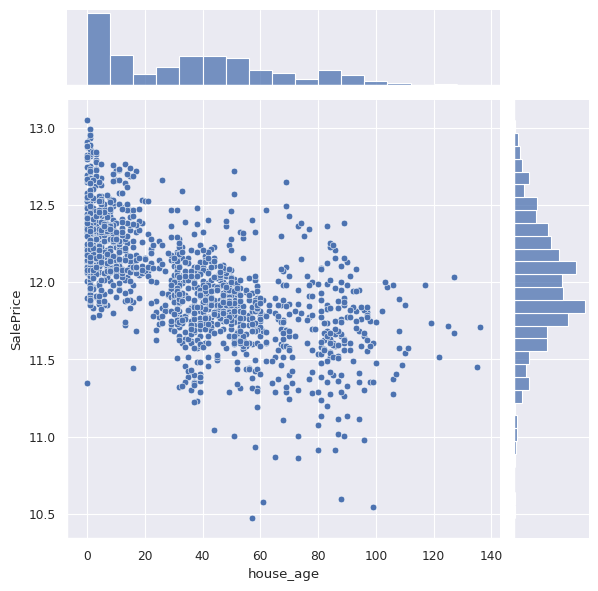

In [409]:
# let use jointplot for two grahp at same plot
# house_age vs SalePrice
sns.jointplot(x = df['house_age'] , y = df['SalePrice'])
plt.show()

In [410]:
#Now we can drop the column  Year built and Year sold since it will not be required further:
df = df.drop(['YearBuilt'], axis = 1)
df = df.drop(['YrSold'], axis = 1)
df.shape

(1357, 47)

In [411]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'Fence', 'MoSold', 'SaleType', 'SaleCondition',
       'SalePrice', 'house_age'],
      dtype='object')

In [412]:
# also
df = df.drop(['Fence'], axis = 1)


In [413]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  \
0      CollgCr       Norm     1Fam     2Story            7            5   
1      Veenker      Feedr     1Fam     1Story            6            8   
2      CollgCr       Norm     1Fam     2Story            7            5   
4      NoRidge       Norm     1Fam     2Story            8            5   
5      Mitchel       Norm     1Fam     1.5Fin            5            5   

   YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType ExterQual  \
0          2003     Gable     VinylSd     VinylSd    BrkFace        Gd   
1          1976     Gable     MetalSd     MetalSd       None        TA   
2          2002     Gable     VinylSd     VinylSd    BrkFace        Gd   
4          2000     Gable     VinylSd     VinylSd    BrkFace        Gd   
5          1995     Gable     VinylSd     VinylSd       None        TA   

  ExterCond Foundation BsmtQual BsmtCond  TotalBsmtSF HeatingQC  1stFlrSF  \
0        TA      PConc       Gd       TA          856        Ex       856   
1        TA     CBlock       Gd       TA         1262        Ex      1262   
2        TA      PConc       Gd       TA          920        Ex       920   
4        TA      PConc       Gd       TA         1145        Ex      1145   
5        TA       Wood       Gd       TA          796        Ex       796   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0       854       1710             1         2         1             3   
1         0       1262             0         2         0             3   
2       866       1786             1         2         1             3   
4      1053       2198             1         2         1             4   
5       566       1362             1         1         1             1   

  KitchenQual  Fireplaces   FireplaceQu GarageType GarageFinish  GarageArea  \
0          Gd           0  No Fireplace     Attchd          RFn         548   
1          TA           1            TA     Attchd          RFn         460   
2          Gd           1            TA     Attchd          RFn         608   
4          Gd           1            TA     Attchd          RFn         836   
5          TA           0  No Fireplace     Attchd          Unf         480   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold SaleType SaleCondition  \
0           0           61              0       2       WD        Normal   
1         298            0              0       5       WD        Normal   
2           0           42              0       9       WD        Normal   
4         192           84              0      12       WD        Normal   
5          40           30              0      10       WD        Normal   

   SalePrice  house_age  
0  12.247699          5  
1  12.109016         31  
2  12.317171          7  
4  12.429220          8  
5  11.870607         16

In [414]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'house_age'],
      dtype='object')

In [415]:
df['MSZoning'].value_counts()


MSZoning
RL         1066
RM          204
FV           64
RH           14
C (all)       9
Name: count, dtype: int64

# Data pre-processing/ data preparation-

1. encoding /binary conversion
2.Dummy vars
3.Re-scaling(normalizing or standarizing)

Let firstly reset the index and assign new index

In [416]:
#type of each feature in data: int, float, object
types = df.dtypes
#numerical values are either type int or float
df_numeric = types[(types == 'int64') | (types == float)]
#categorical values are type object
df_categorical = types[types == object]

In [417]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()


0
object     24
int64      20
float64     2
Name: count, dtype: int64

In [418]:
#we should convert df_numeric to a list to make it easier to work with
numerical_col = list(df_numeric.index)
print(numerical_col)
#similry, Categorical col
categorical_col = list(df_categorical.index)
print(categorical_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'SalePrice', 'house_age']
['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']


In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1357 entries, 0 to 1458
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1357 non-null   int64  
 1   MSZoning       1357 non-null   object 
 2   LotFrontage    1357 non-null   float64
 3   LotArea        1357 non-null   int64  
 4   LotShape       1357 non-null   object 
 5   LandContour    1357 non-null   object 
 6   LotConfig      1357 non-null   object 
 7   Neighborhood   1357 non-null   object 
 8   Condition1     1357 non-null   object 
 9   BldgType       1357 non-null   object 
 10  HouseStyle     1357 non-null   object 
 11  OverallQual    1357 non-null   int64  
 12  OverallCond    1357 non-null   int64  
 13  YearRemodAdd   1357 non-null   int64  
 14  RoofStyle      1357 non-null   object 
 15  Exterior1st    1357 non-null   object 
 16  Exterior2nd    1357 non-null   object 
 17  MasVnrType     1357 non-null   object 
 18  ExterQual    

Creating Dummy columns to convert categorical into numerical


In [420]:
df = pd.get_dummies(df, drop_first=True )
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
0          60         65.0     8450            7            5          2003   
1          20         80.0     9600            6            8          1976   
2          60         68.0    11250            7            5          2002   
4          60         84.0    14260            8            5          2000   
5          50         85.0    14115            5            5          1995   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0          856       856       854       1710             1         2   
1         1262      1262         0       1262             0         2   
2          920       920       866       1786             1         2   
4         1145      1145      1053       2198             1         2   
5          796       796       566       1362             1         1   

   HalfBath  BedroomAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0         1             3           0         548           0           61   
1         0             3           1         460         298            0   
2         1             3           1         608           0           42   
4         1             4           1         836         192           84   
5         1             1           0         480          40           30   

   EnclosedPorch  MoSold  SalePrice  house_age  MSZoning_FV  MSZoning_RH  \
0              0       2  12.247699          5        False        False   
1              0       5  12.109016         31        False        False   
2              0       9  12.317171          7        False        False   
4              0      12  12.429220          8        False        False   
5              0      10  11.870607         16        False        False   

   MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0         True        False         False         False          True   
1         True        False         False         False          True   
2         True        False         False         False         False   
4         True        False         False         False         False   
5         True        False         False         False         False   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0            False            False             True              False   
1            False            False             True              False   
2            False            False             True              False   
4            False            False             True              False   
5            False            False             True              False   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  \
0          False          False              True                 False   
1           True          False             False                 False   
2          False          False              True                 False   
4           True          False             False                 False   
5          False          False              True                 False   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                False                 False                 False   
1                False                 False                 False   
2                False                 False                 False   
4                False                 False                 False   
5                False                 False                 False   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                  True                 False                 False   
1                 False                 False                 False   
2                  True                 False                 False   
4                 False                 False                 False   
5                 False                 False 

spliting the data X , Y

In [421]:
X = df.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
0          60         65.0     8450            7            5          2003   
1          20         80.0     9600            6            8          1976   
2          60         68.0    11250            7            5          2002   
4          60         84.0    14260            8            5          2000   
5          50         85.0    14115            5            5          1995   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0          856       856       854       1710             1         2   
1         1262      1262         0       1262             0         2   
2          920       920       866       1786             1         2   
4         1145      1145      1053       2198             1         2   
5          796       796       566       1362             1         1   

   HalfBath  BedroomAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0         1             3           0         548           0           61   
1         0             3           1         460         298            0   
2         1             3           1         608           0           42   
4         1             4           1         836         192           84   
5         1             1           0         480          40           30   

   EnclosedPorch  MoSold  house_age  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0              0       2          5        False        False         True   
1              0       5         31        False        False         True   
2              0       9          7        False        False         True   
4              0      12          8        False        False         True   
5              0      10         16        False        False         True   

   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0        False         False         False          True            False   
1        False         False         False          True            False   
2        False         False         False         False            False   
4        False         False         False         False            False   
5        False         False         False         False            False   

   LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
0            False             True              False          False   
1            False             True              False           True   
2            False             True              False          False   
4            False             True              False           True   
5            False             True              False          False   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0          False              True                 False                False   
1          False             False                 False                False   
2          False              True                 False                False   
4          False             False                 False                False   
5          False              True                 False                False   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                 False                 False                  True   
1                 False                 False                 False   
2                 False                 False                  True   
4                 False                 False                 False   
5                 False                 False                 False   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
4                 False                 False      

In [422]:
# Putting response variable to y
y = df['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
4    12.429220
5    11.870607
Name: SalePrice, dtype: float64

In [423]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [424]:
X_train.describe(include='all').transpose()

count unique    top freq         mean          std  \
MSSubClass             949.0    NaN    NaN  NaN     57.39726    43.496584   
LotFrontage            949.0    NaN    NaN  NaN    67.728135    18.741914   
LotArea                949.0    NaN    NaN  NaN  9566.871444  4266.477161   
OverallQual            949.0    NaN    NaN  NaN     5.965227     1.297455   
OverallCond            949.0    NaN    NaN  NaN      5.56902     1.102705   
...                      ...    ...    ...  ...          ...          ...   
SaleCondition_AdjLand    949      2  False  946          NaN          NaN   
SaleCondition_Alloca     949      2  False  939          NaN          NaN   
SaleCondition_Family     949      2  False  938          NaN          NaN   
SaleCondition_Normal     949      2   True  785          NaN          NaN   
SaleCondition_Partial    949      2  False  876          NaN          NaN   

                          min     25%     50%      75%      max  
MSSubClass               20.0    20.0    50.0     70.0    190.0  
LotFrontage              21.0    60.0    69.0     76.0    168.0  
LotArea                1300.0  7301.0  9135.0  11249.0  36500.0  
OverallQual               1.0     5.0     6.0      7.0     10.0  
OverallCond               1.0     5.0     5.0      6.0      9.0  
...                       ...     ...     ...      ...      ...  
SaleCondition_AdjLand     NaN     NaN     NaN      NaN      NaN  
SaleCondition_Alloca      NaN     NaN     NaN      NaN      NaN  
SaleCondition_Family      NaN     NaN     NaN      NaN      NaN  
SaleCondition_Normal      NaN     NaN     NaN      NaN      NaN  
SaleCondition_Partial     NaN     NaN     NaN      NaN      NaN  

[167 rows x 11 columns]

In [425]:
X_train.head()


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1049          20         60.0    11100            4            7   
1255          50         52.0     6240            6            6   
342           90         69.0     8544            3            4   
303           20         70.0     9800            5            7   
920           60         70.0     8462            6            5   

      YearRemodAdd  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
1049          2006            0       930         0        930             0   
1255          1950          884       959       408       1367             0   
342           1950            0      1040         0       1040             0   
303           1972          894       894         0        894             1   
920           1994          928       936       785       1721             0   

      FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
1049         1         0             2           0         308           0   
1255         1         0             3           1         560           0   
342          2         0             2           0         400           0   
303          1         0             3           0         552         256   
920          2         1             3           0         471         300   

      OpenPorchSF  EnclosedPorch  MoSold  house_age  MSZoning_FV  MSZoning_RH  \
1049            0              0       4         64        False        False   
1255            0              0      11         76        False        False   
342             0              0       5         57        False        False   
303             0              0       7         34        False        False   
920            87              0       7         13        False        False   

      MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
1049         True        False         False         False          True   
1255        False         True         False         False          True   
342          True        False         False         False          True   
303          True        False         False         False          True   
920          True        False         False         False         False   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
1049            False             True            False              False   
1255            False            False             True              False   
342             False            False             True              False   
303             False            False             True              False   
920             False            False             True              False   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  \
1049          False          False              True                 False   
1255          False          False              True                 False   
342           False          False              True                 False   
303           False          False             False                 False   
920           False          False              True                 False   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
1049                False                 False                 False   
1255                False                  True                 False   
342                 False                 False                 False   
303                 False                 False                 False   
920                 False                 False                 False   

      Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
1049                 False                 False                  True   
1255                 False                 False                 False   
342                  False                 False                 False   
303                   True    

In [426]:
X_test.head()


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
176           60         97.0    10029            6            5   
1416         190         60.0    11340            4            6   
872           20         74.0     8892            5            7   
570           90         74.0    13101            5            5   
816           20         69.0    11425            5            6   

      YearRemodAdd  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
176           1989         1151      1164       896       2060             0   
1416          1950          777      1246      1044       2290             0   
872           1996          105       910         0        910             0   
570           1965         1728      1728         0       1728             0   
816           1954         1008      1008         0       1008             0   

      FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
176          2         1             4           1         521           0   
1416         2         0             4           0         560           0   
872          1         0             3           0         414         196   
570          2         0             6           0         576           0   
816          1         0             2           1         275           0   

      OpenPorchSF  EnclosedPorch  MoSold  house_age  MSZoning_FV  MSZoning_RH  \
176           228              0       9         19        False        False   
1416            0            114       4        125        False        False   
872             0            150      10         55        False        False   
570             0              0      11         43        False        False   
816             0            120       7         52        False        False   

      MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
176          True        False         False         False         False   
1416        False         True         False         False          True   
872          True        False         False         False          True   
570          True        False         False         False         False   
816          True        False         False         False         False   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
176             False            False             True              False   
1416            False            False             True              False   
872             False            False             True              False   
570             False            False             True              False   
816             False            False             True              False   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  \
176           False          False             False                 False   
1416          False          False              True                 False   
872           False          False             False                 False   
570           False          False              True                 False   
816           False          False             False                 False   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
176                 False                 False                  True   
1416                False                 False                 False   
872                 False                 False                 False   
570                 False                 False                 False   
816                 False                 False                 False   

      Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
176                  False                 False                 False   
1416                 False                 False                 False   
872                  False                 False                 False   
570                  False    

Re-sacling

In [427]:
num_col =['MSSubClass','LotArea','OverallQual','OverallCond',
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

In [428]:
# intialize into the object (standarizing)
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [429]:
X_test[num_col] = scaler.fit_transform(X_test[num_col])

# Model Building & model evaluation

let use RFE for automatic feature selection

### model building

In [430]:
print(X_train.shape)
print(X_train.columns)

(949, 167)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=167)


In [431]:
# we are using RFE due to reason being the higher no. of predictive variable
# RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [432]:
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [433]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 16),
 ('LotFrontage', False, 79),
 ('LotArea', False, 38),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', False, 78),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 17),
 ('2ndFlrSF', False, 18),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 21),
 ('FullBath', False, 33),
 ('HalfBath', False, 29),
 ('BedroomAbvGr', False, 64),
 ('Fireplaces', False, 75),
 ('GarageArea', False, 82),
 ('WoodDeckSF', False, 45),
 ('OpenPorchSF', False, 76),
 ('EnclosedPorch', False, 74),
 ('MoSold', False, 81),
 ('house_age', False, 73),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', True, 1),
 ('LotShape_IR3', False, 37),
 ('LotShape_Reg', False, 68),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', False, 55),
 ('LandContour_Lvl', False, 52),
 ('LotConfig_CulDSac', False, 41),
 ('LotConfig_FR2', False, 31),
 ('LotConfig_FR3', False, 30),
 ('LotConfig_Inside', False, 66),

In [434]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'TotalBsmtSF', 'GrLivArea', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2',
       'LandContour_HLS', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition1_RRNn', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_Plywood',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_WdShing',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock',
       'Exterior2nd_HdBoard', 'Exterior2nd_ImSt

In [435]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearRemodAdd', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'house_age', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA',
       'Condition1_RRAe', 'Condition1_RRNe', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'R

In [436]:
X_train_rfe=X_train[col]

In [437]:
X_train_rfe = pd.DataFrame(X_train[col])


In [438]:
X_train_rfe.shape


(949, 83)

In [439]:
#83
X_train_rfe.head()

OverallQual  OverallCond  TotalBsmtSF  GrLivArea  MSZoning_FV  \
1049    -1.515477     1.298384    -2.638796  -1.225417        False   
1255     0.026815     0.391045    -0.331086  -0.150517        False   
342     -2.286623    -1.423633    -2.638796  -0.954847        False   
303     -0.744331     1.298384    -0.304981  -1.313967        False   
920      0.026815    -0.516294    -0.216223   0.720225        False   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LandContour_HLS  \
1049        False         True        False         False            False   
1255        False        False         True         False            False   
342         False         True        False         False            False   
303         False         True        False         False            False   
920         False         True        False         False            False   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1049                 False                False                 False   
1255                 False                False                  True   
342                  False                False                 False   
303                  False                False                 False   
920                  False                False                 False   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
1049                  True                 False                False   
1255                 False                 False                False   
342                  False                 False                False   
303                  False                 False                False   
920                  False                 False                False   

      Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
1049                 False                 False               False   
1255                 False                 False               False   
342                  False                 False                True   
303                  False                 False               False   
920                  False                 False               False   

      Neighborhood_NWAmes  Neighborhood_OldTown  Neighborhood_SWISU  \
1049                False                 False               False   
1255                False                 False               False   
342                 False                 False               False   
303                 False                 False               False   
920                 False                 False               False   

      Neighborhood_Sawyer  Condition1_Feedr  Condition1_Norm  Condition1_PosN  \
1049                False             False             True            False   
1255                False             False             True            False   
342                 False             False             True            False   
303                 False             False             True            False   
920                 False             False             True            False   

      Condition1_RRAn  Condition1_RRNn  HouseStyle_2.5Fin  HouseStyle_2.5Unf  \
1049            False            False              False              False   
1255            False            False              False              False   
342             False            False              False              False   
303             False            False              False              False   
920             False            False              False              False   

      HouseStyle_SFoyer  HouseStyle_SLvl  Exterior1st_BrkFace  \
1049              False            False                False   
1255              False            False                False   
342               False            False                False   
303               False            False                False   
920               False            False                False   

      Exterio

In [440]:
y_LR_Pred = lm.predict(X_train)
print(r2_score(y_train, y_LR_Pred))
RSS = np.sum(np.square(y_train-y_LR_Pred))
print(RSS)
MSE = mean_squared_error(y_train, y_LR_Pred)
print(MSE)
#RMSE
print(MSE*0.5)

0.9318879436347024
8.37396403060249
0.008823987387357735
0.004411993693678867


###residual analysis

Text(0.5, 0, 'Errors')

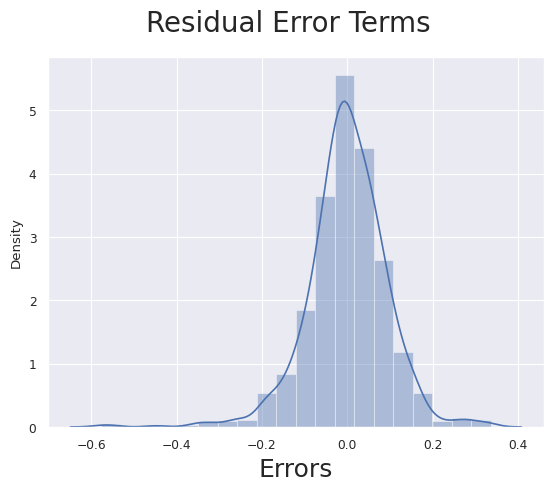

In [441]:
y_LR_Pred = lm.predict(X_train)
res = y_train-y_LR_Pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

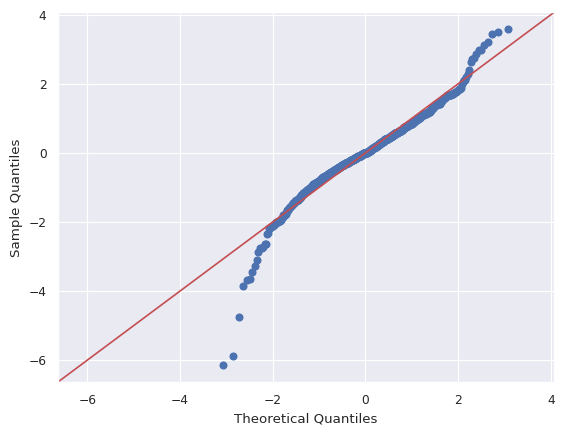

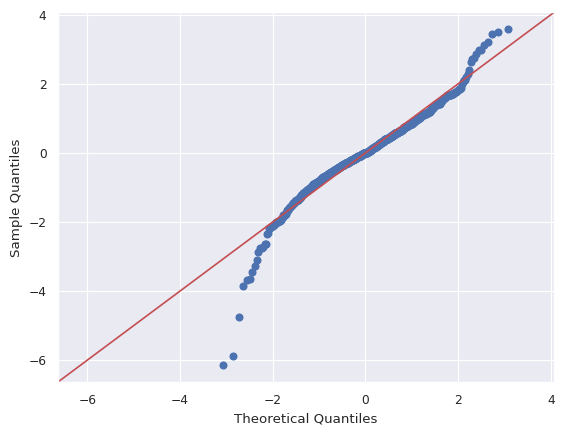

In [442]:
sm.qqplot(res, fit=True,line='45')

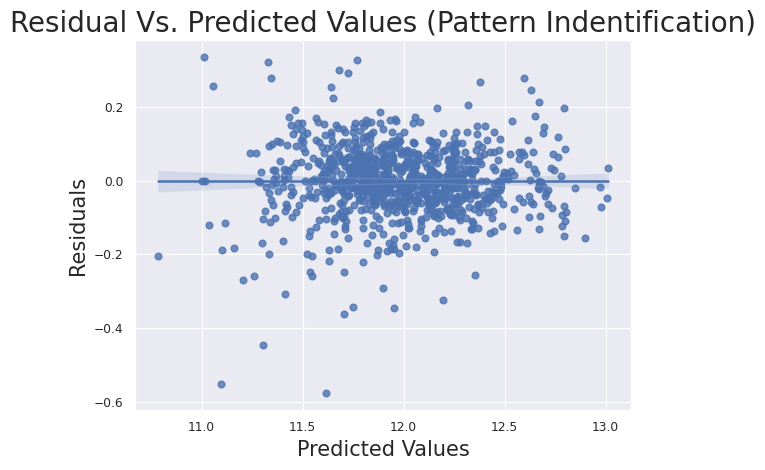

In [443]:
sns.regplot(x=y_LR_Pred, y=res)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

###residual plot vs prediction plot

In [444]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)

rfe_df

Variable  rfe_support  rfe_ranking
0             OverallQual         True            1
1             OverallCond         True            1
2             TotalBsmtSF         True            1
3               GrLivArea         True            1
4             MSZoning_FV         True            1
..                    ...          ...          ...
78           SaleType_New         True            1
79           SaleType_Oth         True            1
80  SaleCondition_AdjLand         True            1
81   SaleCondition_Family         True            1
82   SaleCondition_Normal         True            1

[83 rows x 3 columns]

In [445]:
# Assign the 50 columns to X_train_rfe
X_train_rfe = X_train[col]

In [446]:
# Associate the new 50 columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Regulization
- ridge regression

In [447]:
# list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [448]:
# the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 0.2}


In [449]:
#fit the data to ridge
ridge = Ridge(alpha=0.2)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.06806912  0.0536572   0.07211605  0.12367397  0.15125446  0.14463758
  0.14242088  0.07610238  0.06123554  0.06129045 -0.14216862 -0.11370552
 -0.08306884 -0.12670964 -0.05647768 -0.12563564 -0.24418591 -0.07799455
 -0.09395047 -0.07597408 -0.14156117 -0.15362701 -0.0883647   0.07466615
  0.10223608  0.09790719  0.12635326  0.12936709 -0.17260886 -0.12207315
  0.09753961  0.06043118  0.09849059 -0.02428111  0.07353957  0.05342589
  0.06887291  0.08512804  0.06413851 -0.1715787  -0.05459396 -0.02428111
 -0.10112423 -0.19574226 -0.04894181 -0.11757762 -0.08380648 -0.08414524
 -0.17370702 -0.17527297 -0.0817397  -0.07807198 -0.09399613 -0.06674024
 -0.06902474  0.07378445  0.11644262  0.06782652 -0.12873241 -0.08940249
 -0.00166407 -0.11861178  0.12301148 -0.00166407  0.23615075  0.09953583
 -0.06941902 -0.08135138 -0.12458097 -0.14450571 -0.09184449 -0.0627218
 -0.17246327 -0.04922121  0.15648306  0.07894647  0.04622858  0.21665879
  0.15032098  0.13908527  0.11940302  0.08215954  0.

In [450]:
# display the mean scores
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
4          0.2         -0.080588        -0.092370                1
5          0.3         -0.080701        -0.092374                2
6          0.4         -0.080822        -0.092380                3
7          0.5         -0.080950        -0.092383                4
3          0.1         -0.080497        -0.092385                5
8          0.6         -0.081085        -0.092401                6
9          0.7         -0.081228        -0.092424                7
10         0.8         -0.081373        -0.092470                8
2         0.01         -0.080437        -0.092502                9
1        0.001         -0.080433        -0.092517               10
11         0.9         -0.081518        -0.092518               11
0       0.0001         -0.080432        -0.092519               12
12         1.0         -0.081661        -0.092561               13
13         2.0         -0.082977        -0.093026               14
14         3.0         -0.084040        -0.093462               15
15         4.0         -0.084922        -0.093837               16
16         5.0         -0.085674        -0.094181               17
17         6.0         -0.086338        -0.094513               18
18         7.0         -0.086942        -0.094842               19
19         8.0         -0.087485        -0.095153               20
20         9.0         -0.087989        -0.095458               21
21        10.0         -0.088456        -0.095732               22
22          20         -0.091960        -0.097867               23
23          50         -0.097151        -0.101501               24
24         100         -0.101439        -0.104765               25
25         500         -0.117418        -0.119112               26

In [451]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.9079917603328158
r2_test:
0.8604988284830996
RSS_train:
11.3118547670894
RSS_test:
8.666209332628998
MSE_train:
0.011919762662897156
MSE_test:
0.021240709148600486


>Even though R2 score test train showing good values but the ridge regression considere so many predictors into count


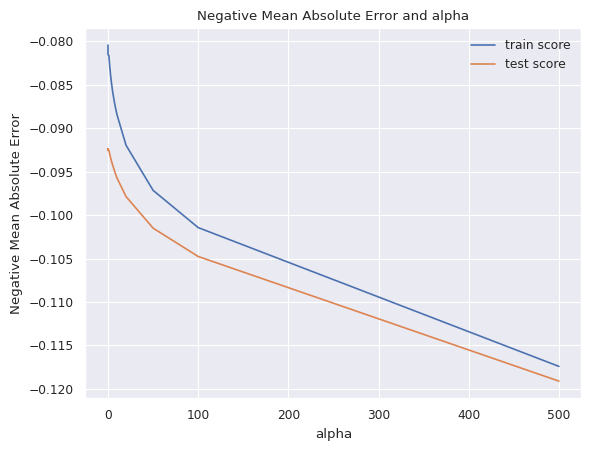

In [455]:
# plotting mean test and train scoes with alpha

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [456]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0             OverallQual       0.0681
1             OverallCond       0.0537
2             TotalBsmtSF       0.0721
3               GrLivArea       0.1237
4             MSZoning_FV       0.1513
..                    ...          ...
78           SaleType_New       0.1503
79           SaleType_Oth       0.1391
80  SaleCondition_AdjLand       0.1194
81   SaleCondition_Family       0.0822
82   SaleCondition_Normal       0.0927

[83 rows x 2 columns]

In [457]:
#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure       Coef
0             OverallQual  11.923956
65            BsmtCond_TA   0.236151
78           SaleType_New   0.216659
75         SaleType_ConLD   0.156483
5             MSZoning_RH   0.151254
79           SaleType_Oth   0.150321
6             MSZoning_RL   0.144638
7             MSZoning_RM   0.142421
80  SaleCondition_AdjLand   0.139085
28      HouseStyle_2.5Fin   0.129367

##Lasso Regression


In [458]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8830257128502962
0.8769753762131275


In [459]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [460]:
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [461]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [462]:
lasso.coef_

array([ 0.07272232,  0.05381602,  0.07364245,  0.12169645,  0.10016611,
        0.08043919,  0.08868464,  0.01875218,  0.0586168 ,  0.05829866,
       -0.09387325, -0.09836793, -0.07327972, -0.11257667, -0.04879787,
       -0.1266579 , -0.2217547 , -0.06973159, -0.08277047, -0.06498121,
       -0.1327207 , -0.14590792, -0.07623435,  0.06530228,  0.09420922,
        0.08175272,  0.11240583,  0.09921968, -0.14570896, -0.11397691,
        0.09524337,  0.05729334,  0.07022415, -0.        ,  0.03705817,
        0.01657523,  0.00802955,  0.04536419,  0.02335814, -0.13687334,
       -0.01490914, -0.        , -0.06110843, -0.13260003, -0.01163302,
       -0.06810335, -0.02906071, -0.04052953, -0.13523255, -0.15161041,
       -0.06489275, -0.06353997, -0.01437362, -0.        , -0.        ,
        0.06583395,  0.10918513,  0.04840462, -0.13195117, -0.09325917,
        0.        , -0.12479062,  0.11333843,  0.        ,  0.16083663,
        0.09221908, -0.02875052, -0.04511372, -0.08788003, -0.09

In [463]:
#printing R@, RSS, MSE values for test and train sets in Lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric3.append(mse_test_lr)

r2_train:
0.9060305021313665
r2_test:
0.8661724613049951
RSS_train:
11.55297956217088
RSS_test:
8.313747133377396
MSE_train:
0.012173845692487755
MSE_test:
0.020376831209258324


In [464]:
cv_result_lsso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.025700      0.005583         0.005614        0.001338       0.0001   
1       0.024126      0.005881         0.009855        0.001749       0.0010   
2       0.025791      0.005224         0.010310        0.000741       0.0100   
3       0.014449      0.005783         0.005687        0.002085       0.1000   
4       0.009605      0.000254         0.004544        0.000108       0.2000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.088969          -0.097138          -0.094657   
1   {'alpha': 0.001}          -0.095473          -0.098029          -0.101292   
2    {'alpha': 0.01}          -0.108634          -0.112127          -0.118815   
3     {'alpha': 0.1}          -0.171292          -0.148373          -0.170681   
4     {'alpha': 0.2}          -0.249896          -0.204650          -0.243167   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.092367          -0.094090        -0.093444        0.002710   
1          -0.098836          -0.099725        -0.098671        0.001931   
2          -0.114855          -0.113381        -0.113563        0.003336   
3          -0.151208          -0.151710        -0.158653        0.010136   
4          -0.211022          -0.215034        -0.224754        0.018212   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.081821           -0.081496   
1                2           -0.092665           -0.092555   
2                3           -0.112770           -0.112397   
3                4           -0.159145           -0.156099   
4                5           -0.226789           -0.221638   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.080957           -0.081553           -0.081473   
1           -0.091661           -0.093507           -0.092340   
2           -0.111122           -0.110824           -0.111496   
3           -0.154594           -0.159484           -0.156219   
4           -0.220290           -0.226691           -0.224796   

   mean_train_score  std_train_score  
0         -0.081460         0.000280  
1         -0.092546         0.000594  
2         -0.111722         0.000744  
3         -0.157108         0.001893  
4         -0.224041         0.002645

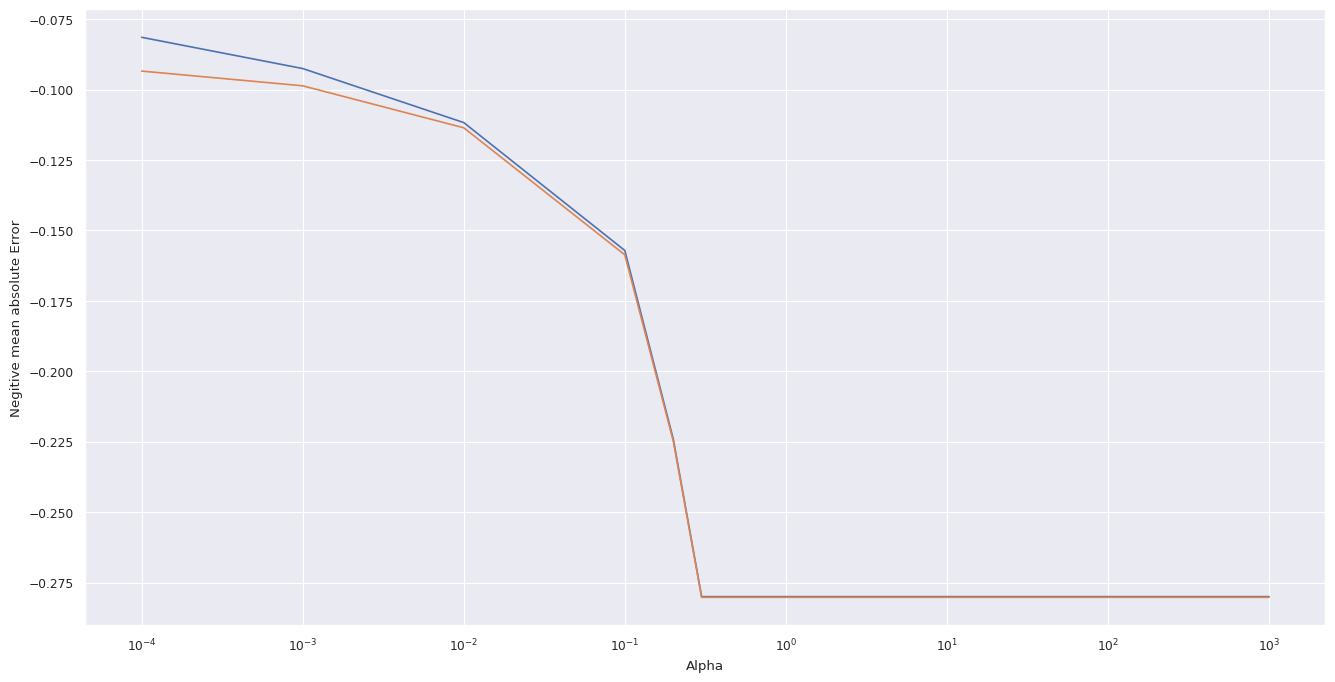

In [465]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_train_score'])
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [466]:
#checking for the alpha 0.001
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8830257128502962
0.8769753762131275


In [467]:
#getting features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0       OverallQual  11.905532
79     SaleType_Oth   0.123368
4       MSZoning_FV   0.114221
1       OverallCond   0.098653
57  Foundation_Slab   0.091908
3         GrLivArea   0.083503
2       TotalBsmtSF   0.054130
5       MSZoning_RH   0.043285
25  Condition1_PosN   0.038770
7       MSZoning_RM   0.037301

In [468]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0                OverallQual       0.0987
1                OverallCond       0.0541
2                TotalBsmtSF       0.0835
3                  GrLivArea       0.1142
4                MSZoning_FV       0.0433
5                MSZoning_RL       0.0373
6                MSZoning_RM      -0.0613
7               LotShape_IR2       0.0105
8            LandContour_HLS       0.0307
9       Neighborhood_Edwards      -0.0308
10       Neighborhood_IDOTRR      -0.0382
11        Neighborhood_NAmes      -0.0060
12      Neighborhood_OldTown      -0.0537
13        Neighborhood_SWISU      -0.0589
14           Condition1_Norm       0.0388
15         HouseStyle_SFoyer       0.0365
16           HouseStyle_SLvl       0.0292
17       Exterior1st_BrkFace       0.0335
18       Exterior1st_VinylSd       0.0170
19       Exterior2nd_HdBoard      -0.0007
20       Exterior2nd_Plywood       0.0111
21       Exterior2nd_Wd Shng      -0.0576
22              ExterQual_TA      -0.0050
23              ExterCond_Fa      -0.0016
24         Foundation_CBlock       0.0315
25          Foundation_PConc       0.0919
26               BsmtQual_Fa      -0.0953
27               BsmtQual_Gd      -0.0593
28               BsmtQual_TA      -0.1134
29               BsmtCond_Gd       0.0348
30               BsmtCond_TA       0.0355
31  FireplaceQu_No Fireplace      -0.0384
32            FireplaceQu_TA      -0.0005
33    GarageFinish_No Garage      -0.1607
34          GarageFinish_Unf      -0.0400
35              SaleType_New       0.1234
36      SaleCondition_Normal       0.0621

In [469]:

# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm)
rfe = rfe.fit(X_train_lasso, y_train)

In [470]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

tempLS_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
tempLS_df = tempLS_df.loc[tempLS_df['rfe_support'] == True]
tempLS_df.reset_index(drop=True, inplace=True)

tempLS_df['Coefficient'] = tempLS_df['Features'].apply(find)
tempLS_df = tempLS_df.sort_values(by=['Coefficient'], ascending=False)
tempLS_df = tempLS_df.head(10)
tempLS_df

Features  rfe_support  rfe_ranking  Coefficient
16          SaleType_New         True            1     0.123368
2              GrLivArea         True            1     0.114221
0            OverallQual         True            1     0.098653
1            TotalBsmtSF         True            1     0.083503
17  SaleCondition_Normal         True            1     0.062072
3            MSZoning_FV         True            1     0.043285
4            MSZoning_RL         True            1     0.037301
14           BsmtCond_TA         True            1     0.035543
13           BsmtCond_Gd         True            1     0.034753
6        LandContour_HLS         True            1     0.030743

In [471]:
tempLS_df['Features'].value_counts()

Features
SaleType_New            1
GrLivArea               1
OverallQual             1
TotalBsmtSF             1
SaleCondition_Normal    1
MSZoning_FV             1
MSZoning_RL             1
BsmtCond_TA             1
BsmtCond_Gd             1
LandContour_HLS         1
Name: count, dtype: int64

##comparing the results of both Ridge and lasso


In [474]:
#comparing the results of both Ridge and lasso

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric2}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.907992          0.906031
1    R2Score Test          0.860499          0.866172
2       RSS Train         11.311855         11.552980
3        RSS Test          8.666209          8.313747
4       MSE Train          0.011920          0.012174
5        MSE Test          0.021241          0.020377

After compairing both the model we can see that the below Features are best explaining the DataSet

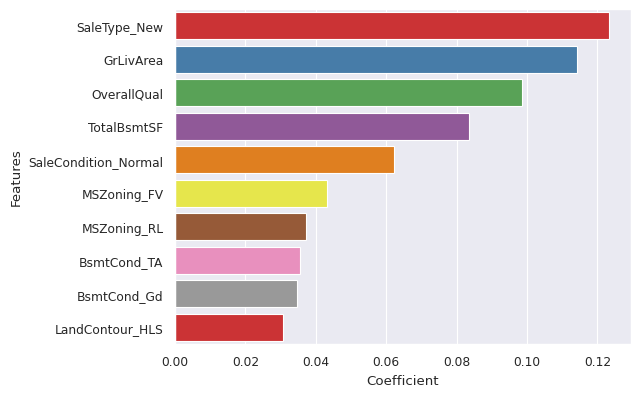

In [475]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = tempLS_df)
plt.show()

Conclusion :
significant variables in predicting the price of a house and How well those variables describe the price of a house:
- MSZoning_FV :Floating Village Residential also has significant effect in the sales price.
-GrLivArea :Above grade (ground) living area square feet also has significant increase in the sales price.
-MSZoning_RL : Residential Low Density is good then it will also has significant effect on sales price.
-OverallQual : Quality of over all house also has significant increase in the sales price.
-Foundation_PConc: Poured Contrete foundation has also significant impact on the sales price
-TotalBsmtSF :Total square feet of basement area is also a reason to increase in salesprice
-OverallCond : If the Overall Condition is Excellent the SalePrice is higher
-SaleCondition_Normal: Normal Sale when compared to othersales has an improvement in the sales price
Neighborhood_NridgHt
-Neighborhood_Crawfor: Neighbourhod Crawford and Northridge Heights also place a role in increase the sales price.
If they concentrating/investing on these varibles well they can notice significant increase in the sales price.

The optimal lambda/alpha value in case of Ridge and Lasso is as below:
- Ridge - 0.3
- Lasso - 0.0001

The Mean Squared error in case of Ridge and Lasso are:
- Ridge - 0.01336662590140295
- Lasso - 0.013515001509412367

The Mean Squared Error of ridge is slightly lower than that of lasso
>Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

>Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality , condition of the house, Foundation type of the house, Total basement area in square feet,neighbourhood etc

Therefore, the variables predicted by Lasso in the above bar chart as >significant variables for predicting the price of a house.



---



---



---



# part 2 (subjective question rough work)

In [ ]:
# part 2 (subjective question rough work)

##Qn.1

In [476]:
# double apha
# Ridge regression
ridge = Ridge(alpha=0.4)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.06933715  0.053655    0.07263768  0.12323145  0.1394074   0.12838221
  0.12976664  0.06177759  0.06132033  0.06072858 -0.12560582 -0.10872974
 -0.07972957 -0.12218081 -0.05456954 -0.12510098 -0.23341768 -0.07542339
 -0.0904607  -0.0728838  -0.13813348 -0.15096971 -0.08471368  0.07235858
  0.0999522   0.09392177  0.12211206  0.11874531 -0.16082036 -0.11854021
  0.09649926  0.06002192  0.09325167 -0.02692995  0.0664868   0.04602172
  0.05762412  0.07661431  0.05681638 -0.16015948 -0.04769865 -0.02692995
 -0.09277342 -0.17605645 -0.04126071 -0.10624759 -0.07378049 -0.07449277
 -0.16505529 -0.16095719 -0.07768438 -0.07460335 -0.07657539 -0.05176612
 -0.05368483  0.07128037  0.11479257  0.06283744 -0.12742968 -0.08956914
 -0.00119811 -0.11927135  0.1199512  -0.00119811  0.19026794  0.09729982
 -0.06073032 -0.07341908 -0.11653319 -0.13171785 -0.08355651 -0.06362441
 -0.17079163 -0.04871786  0.13396427  0.07173976  0.03950663  0.17325044
  0.14957194  0.12934573  0.10649241  0.07910004  0

In [477]:
#printing the values of R2, RSS, MSE for train and test

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric4.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric4.append(mse_test_lr)

r2_train:
0.9076451509698271
r2_test:
0.8630638754005553
RSS_train:
11.354468285065867
RSS_test:
8.5068613264942
MSE_train:
0.011964666264558343
MSE_test:
0.0208501503100348


In [478]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0             OverallQual       0.0693
1             OverallCond       0.0537
2             TotalBsmtSF       0.0726
3               GrLivArea       0.1232
4             MSZoning_FV       0.1394
..                    ...          ...
78           SaleType_New       0.1496
79           SaleType_Oth       0.1293
80  SaleCondition_AdjLand       0.1065
81   SaleCondition_Family       0.0791
82   SaleCondition_Normal       0.0918

[83 rows x 2 columns]

In [479]:
#feature reduction - taking top 10 features from ridge
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols =  X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0             OverallQual  11.914177
65            BsmtCond_TA   0.190268
78           SaleType_New   0.173250
79           SaleType_Oth   0.149572
5             MSZoning_RH   0.139407
75         SaleType_ConLD   0.133964
7             MSZoning_RM   0.129767
80  SaleCondition_AdjLand   0.129346
6             MSZoning_RL   0.128382
4             MSZoning_FV   0.123231

In [480]:
# Lasso Regression:

lm = Lasso(alpha=0.002)
lm.fit(X_train,y_train)

#r2 train
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

#r2 test
y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8678202548636506
0.8716742376442174


In [481]:
# prnitng R2, RSS, MSE of test train when we double the alpha value for Lasso
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric5=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric5.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric5.append(mse_test_lr)

r2_train:
0.8678202548636506
r2_test:
0.8716742376442174
RSS_train:
16.250697606450956
RSS_test:
7.971961147363445
MSE_train:
0.017124022767598477
MSE_test:
0.01953912045922413


In [482]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lm.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0                OverallQual       0.1107
1                OverallCond       0.0514
2                TotalBsmtSF       0.0858
3                  GrLivArea       0.1103
4                MSZoning_RL       0.0198
5                MSZoning_RM      -0.0817
6            LandContour_HLS       0.0003
7       Neighborhood_Edwards      -0.0100
8       Neighborhood_OldTown      -0.0388
9         Neighborhood_SWISU      -0.0128
10           Condition1_Norm       0.0306
11           HouseStyle_SLvl       0.0084
12       Exterior1st_BrkFace       0.0014
13       Exterior1st_VinylSd       0.0012
14       Exterior2nd_VinylSd       0.0117
15       Exterior2nd_Wd Shng      -0.0052
16              ExterQual_TA      -0.0004
17         Foundation_CBlock       0.0238
18          Foundation_PConc       0.0835
19               BsmtQual_Fa      -0.0232
20               BsmtQual_Gd      -0.0064
21               BsmtQual_TA      -0.0701
22  FireplaceQu_No Fireplace      -0.0397
23    GarageFinish_No Garage      -0.1497
24          GarageFinish_Unf      -0.0401
25              SaleType_New       0.1012
26      SaleCondition_Normal       0.0430

In [483]:

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm)
rfe = rfe.fit(X_train_lasso, y_train)

In [484]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lm.coef_, index = X_train_lasso.columns))

# Assign top 10 features to a temp dataframe for further display in the bar plot
df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df['Coefficient'] = df['Features'].apply(find)
df = df.sort_values(by=['Coefficient'], ascending=False)
df = df.head(10)
df

Features  rfe_support  rfe_ranking  Coefficient
11          SaleType_New         True            1     0.151915
2              GrLivArea         True            1     0.114677
0            OverallQual         True            1     0.092311
1            TotalBsmtSF         True            1     0.086123
12  SaleCondition_Normal         True            1     0.081989
4        LandContour_HLS         True            1     0.054961
6        HouseStyle_SLvl         True            1     0.048200
3            MSZoning_RM         True            1    -0.099810
5     Neighborhood_SWISU         True            1    -0.106562
7    Exterior2nd_Wd Shng         True            1    -0.114063

In [485]:
#Comparing the Ridge and Lasso after double the vlaues of alpha
resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric4}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric5, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.907645          0.867820
1    R2Score Test          0.863064          0.871674
2       RSS Train         11.354468         16.250698
3        RSS Test          8.506861          7.971961
4       MSE Train          0.011965          0.017124
5        MSE Test          0.020850          0.019539

Here Lasso given the very close result of R2 score for both test and train. The most important feature after double the value of alpha is

- GrLivArea
-OverallQual
-TotalBsmtSF
-Neighborhood_SWISU



## Qn.3

In [498]:
X_lass = X

X_lass = X_lass.drop(["MSZoning_FV", "GrLivArea", "MSZoning_RL", "OverallQual", "Foundation_PConc"], axis=1)

y_lass =y

X_train_lass, X_test_lass, y_train_lass, y_test_lass = train_test_split(X_lass, y_lass, train_size=0.7, test_size=0.3, random_state=100)
num_col =['MSSubClass','LotArea','OverallCond',
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
X_train_lass[num_col] = scaler.fit_transform(X_train_lass[num_col])
X_test_lass[num_col] = scaler.transform(X_test_lass[num_col])
# linear regression
lm = LinearRegression()
lm.fit(X_train_lass, y_train_lass)

# running RFE
rfe = RFE(lm)
rfe = rfe.fit(X_train_lass, y_train_lass)
# Assign the columns selected by RFE to cols

col = X_train_lass.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp1 = pd.DataFrame(list(zip(X_train_lass.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp1 = temp1.loc[temp1['rfe_support'] == True]
temp1.reset_index(drop=True, inplace=True)

temp1

Variable  rfe_support  rfe_ranking
0              MSSubClass         True            1
1             OverallCond         True            1
2             TotalBsmtSF         True            1
3                1stFlrSF         True            1
4                2ndFlrSF         True            1
..                    ...          ...          ...
76         SaleType_ConLD         True            1
77           SaleType_New         True            1
78  SaleCondition_AdjLand         True            1
79   SaleCondition_Normal         True            1
80  SaleCondition_Partial         True            1

[81 rows x 3 columns]

In [499]:
# Assign the 50 columns to X_train_rfe

X_train_lass_rfe = X_train_lass[col]
# Associate the new 50 columns to X_train and X_test for further analysis

X_train_lass = X_train_lass_rfe[X_train_lass_rfe.columns]
X_testLS_lass =  X_test_lass[X_train_lass.columns]

In [501]:
# Lasso Regression:

lm = Lasso(alpha=0.001)
lm.fit(X_train_lass,y_train_lass)

y_train_pred_lass = lm.predict(X_train_lass)
print(r2_score(y_true=y_train_lass,y_pred=y_train_pred_lass))

y_test_pred_lass  = lm.predict(X_testLS_lass)
print(r2_score(y_true=y_test_lass,y_pred=y_test_pred_lass))

0.8812149222178981
0.867072257128408


In [502]:
#printing R2, RSS, MSE results
r2_train_lr = r2_score(y_train_lass ,y_train_pred_lass)
print(r2_train_lr)


r2_test_lr = r2_score(y_test_lass, y_test_pred_lass)
print(r2_test_lr)


rss1_lr = np.sum(np.square(y_train_lass-y_train_pred_lass))
print(rss1_lr)


rss2_lr = np.sum(np.square(y_test_lass - y_test_pred_lass))
print(rss2_lr)


mse_train_lr = mean_squared_error(y_train_lass,y_train_pred_lass)
print(mse_train_lr)


mse_test_lr = mean_squared_error(y_test_lass , y_test_pred_lass)
print(mse_test_lr)

0.8812149222178981
0.867072257128408
15.647917851840644
7.134754253780997
0.01648884915894694
0.017487142778874993


In [503]:
model_param = list(lm.coef_)
model_param.insert(0,lm.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)
#(["MSZoning_FV", "GrLivArea", "MSZoning_RL", "OverallQual", "Foundation_PConc"]#

Featuere       Coef
0            OverallQual  12.055703
5            MSZoning_RH   0.133039
78          SaleType_New   0.113102
20  Neighborhood_OldTown   0.105836
4            MSZoning_FV   0.097487
3              GrLivArea   0.086837
24       Condition1_Norm   0.084767
25       Condition1_PosN   0.081241
56      Foundation_PConc   0.064219
35   Exterior1st_Plywood   0.063465

After removing the five most important fetaure that we have got prior "MSZoning_FV", "GrLivArea", "MSZoning_RL", "OverallQual", "Foundation_PConc" I have got the other important fetaures to predict the sales price with Overall condition, Lot area, shape, Condition1, IsRemodeled.

------------------------------------------